# About the Dataset:

The dataset used in the task OffensEval is the Offensive Language Identification Dataset (OLID) . This dataset was created specifically for this task. It contains 14,100 English tweets, 13,240 provided as the training data and 860 as the testing data. 

Twitter user mentions were substituted by @USER and URLs have been substitute by URL.

OLID is annotated using a hierarchical annotation. Each instance contains up to 3 labels each corresponding to one of the following levels:

- Level (or sub-task) A: Offensive language identification; 

- Level (or sub-task) B: Automatic categorization of offense types;

- Level (or sub-task) C: Offense target identification.


## Columns:


### **1. del**

-   **Description**: This column is index. A identifier.

### **2. id**

-   **Description**: This column represents a **unique identifier** for each social media post (tweet). It is typically a string or integer value that uniquely distinguishes each entry in your dataset.
-   **Purpose**: This column is useful for identifying individual posts or when you need to track a specific tweet for analysis, especially if you are working with a large dataset.

### **3. tweet**

-   **Description**: This column contains the **text content** of the tweet, which represents the actual post made by the user.
-   **Purpose**: This is the core content that you will analyze to determine whether the tweet is offensive, and if so, what type of offense it is. You can perform various NLP tasks on this text data, such as tokenization, sentiment analysis, and text classification.

### **4. subtask_a**

-   **Description**: This is a **binary classification** column indicating whether the tweet is offensive or not.
    -   **Values**:
        -   NOT: The tweet is **not offensive**.
        -   OFF: The tweet is **offensive**, including insults, threats, or untargeted profanity.
-   **Purpose**: This column is essential for identifying the general nature of the tweet (offensive or non-offensive) and is typically used as the target variable in binary classification tasks.

### **5. subtask_b**

-   **Description**: For tweets labeled as "Offensive" in **subtask_a**, this column classifies the type of offense.
    -   **Values**:
        -   TIN: **Targeted Insult** — The offensive tweet is aimed at a specific individual or group.
        -   UNT: **Untargeted** — The tweet contains profanity or offensive language but is not aimed at any specific individual or group.
-   **Purpose**: This column further refines the categorization of offensive tweets. You would use this in a multi-class classification task to distinguish between different types of offensive content (targeted vs. untargeted).

### **6. subtask_c**

-   **Description**: For tweets labeled as "Targeted Insult" in **subtask_b**, this column specifies the **offense target**.
    -   **Values**:
        -   IND: **Individual** — The offensive content targets a specific individual.
        -   GRP: **Group** — The offensive content targets a specific group, community, or demographic.
        -   OTH: **Others** — The offensive content targets entities like organizations, institutions, or general concepts.
-   **Purpose**: This column helps further categorize tweets labeled as "Targeted Insult" into more specific categories, enabling more granular analysis of offensive content based on the target.

### **7. cleaned_tweet**

-   **Description**: This column contains the **cleaned version** of the tweet text. Cleaning typically involves removing stop words, special characters, hashtags, mentions, URLs, and other non-essential elements that do not contribute to the meaning of the tweet.
-   **Purpose**: The cleaned tweet is used for NLP tasks such as text classification, sentiment analysis, or topic modeling, where the raw tweet text might have irrelevant or noisy elements that could hinder model performance.

----------

### **Summary Table of Columns:**

| **Column Name**   | **Description**                                           | **Example (Row 1)**                                                           | **Example (Row 2)**                                                           |
|-------------------|-----------------------------------------------------------|-------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
| **`del`**         | Identifier or meta information (unclear)                  | `86426`                                                                       | `90194`                                                                       |
| **`id`**          | Unique identifier for each tweet                          | `86426`                                                                       | `90194`                                                                       |
| **`tweet`**       | Raw text content of the tweet                             | `@USER She should ask a few native Americans what their take on this is.`     | `@USER @USER Go home youâ€™re drunk!!! @USER #MAGA #Trump2020 ðŸ‘ŠðŸ‡ºðŸ‡¸ðŸ‘Š URL` |
| **`subtask_a`**   | Offensive or non-offensive classification                  | `OFF`                                                                          | `OFF`                                                                          |
| **`subtask_b`**   | Type of offense (Targeted Insult or Untargeted)           | `UNT`                                                                          | `TIN`                                                                          |
| **`subtask_c`**   | Target of offense (Individual, Group, or Other)           | (Empty, as the offense is untargeted)                                          | `IND`                                                                          |
| **`cleaned_tweet`** | Cleaned version of the tweet text                          | `ask native americans take`                                                   | `home drunk url`                                                              |


In [258]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [259]:
df = pd.read_csv('cleaned_train_data_v0.csv')
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet
0,0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN,ask native americans take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND,home drunk url
2,2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN,amazon investigating chinese employees selling...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN,someone vetaken piece shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN,obama wanted liberals illegals move red states


In [260]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   del            13240 non-null  int64 
 1   id             13240 non-null  int64 
 2   tweet          13240 non-null  object
 3   subtask_a      13240 non-null  object
 4   subtask_b      4400 non-null   object
 5   subtask_c      3876 non-null   object
 6   cleaned_tweet  13156 non-null  object
dtypes: int64(2), object(5)
memory usage: 724.2+ KB


In [261]:
print(df.isnull().sum())

del                 0
id                  0
tweet               0
subtask_a           0
subtask_b        8840
subtask_c        9364
cleaned_tweet      84
dtype: int64


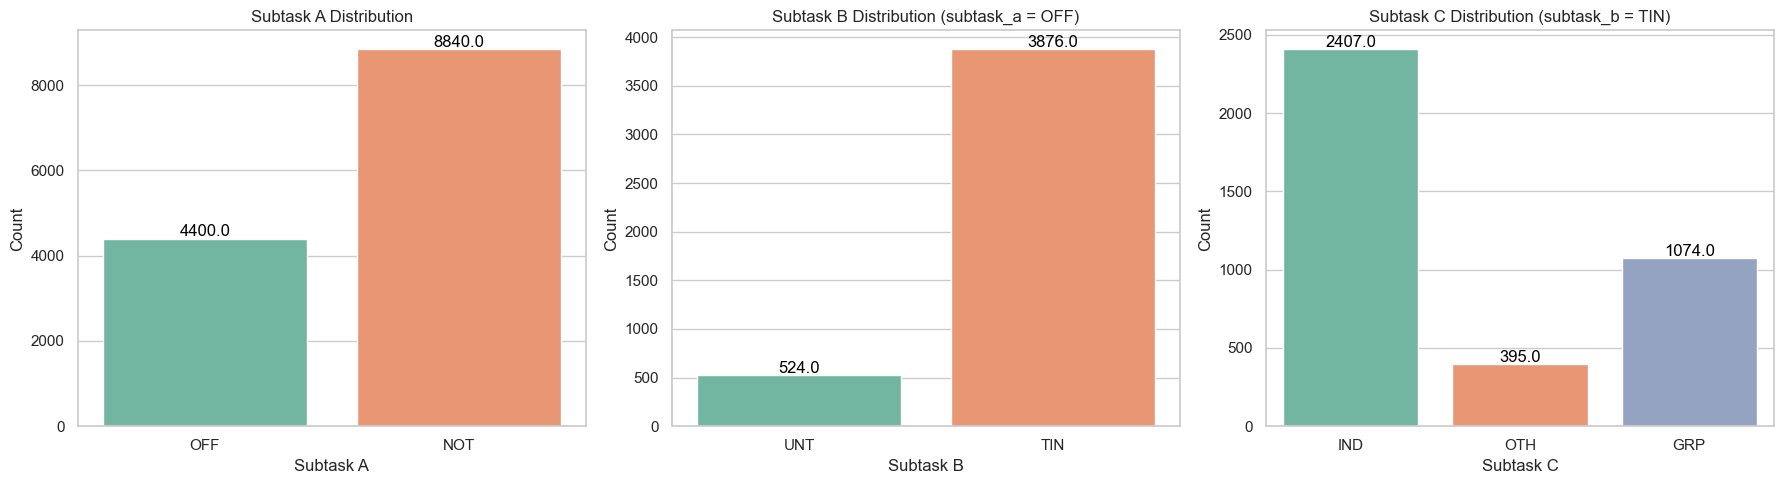

In [262]:
# Set up seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subtask A distribution
ax1 = sns.countplot(x='subtask_a', data=df, ax=axes[0], hue='subtask_a', palette='Set2', legend=False)
axes[0].set_title('Subtask A Distribution')
axes[0].set_xlabel('Subtask A')
axes[0].set_ylabel('Count')

# Annotate values on top of bars for subtask_a
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Subtask B distribution when subtask A is OFF
ax2 = sns.countplot(x='subtask_b', data=df[df['subtask_a'] == 'OFF'], ax=axes[1], hue='subtask_b', palette='Set2', legend=False)
axes[1].set_title('Subtask B Distribution (subtask_a = OFF)')
axes[1].set_xlabel('Subtask B')
axes[1].set_ylabel('Count')

# Annotate values on top of bars for subtask_b
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Subtask C distribution when subtask B is TIN
ax3 = sns.countplot(x='subtask_c', data=df[df['subtask_b'] == 'TIN'], ax=axes[2], hue='subtask_c', palette='Set2', legend=False)
axes[2].set_title('Subtask C Distribution (subtask_b = TIN)')
axes[2].set_xlabel('Subtask C')
axes[2].set_ylabel('Count')

# Annotate values on top of bars for subtask_c
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Adjust layout for better readability
plt.tight_layout()
plt.savefig("./Analysis_Dashboard/figures/distribution.png")
plt.show()

In [263]:
import nltk

In [264]:
df['subtask_a'] = pd.get_dummies(df['subtask_a'], drop_first=True).astype(int)

mapping = {np.nan:0,'UNT':1,'TIN':2}
df['subtask_b'] = df['subtask_b'].map(mapping)

mapping = {np.nan: 0, 'IND': 1, 'OTH': 2, 'GRP': 3}
df['subtask_c'] = df['subtask_c'].map(mapping)

df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk url
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,1,0,someone vetaken piece shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,0,0,obama wanted liberals illegals move red states


In [265]:
def search_tweets_with_word(word):
    # Filter the dataset into two subsets: 'hate' and 'not hate' based on subtask_a
    hate_tweets = df_filtered[df_filtered['subtask_a'] == 1]  # Assuming 1 represents 'hate'
    non_hate_tweets = df_filtered[df_filtered['subtask_a'] == 0]  # Assuming 0 represents 'non-hate'
    
    
    # Specific word to search for
    word_to_search = word
    
    # Check for the presence of the word in 'hate' and 'non-hate' tweets
    hate_tweets_containing_word = hate_tweets[hate_tweets['cleaned_tweet'].str.contains(word_to_search, case=False)]
    non_hate_tweets_containing_word = non_hate_tweets[non_hate_tweets['cleaned_tweet'].str.contains(word_to_search, case=False)]
    
    # Display the count of tweets containing the word
    print(f"Hate tweets containing '{word_to_search}': {len(hate_tweets_containing_word)}")
    print(f"Non-hate tweets containing '{word_to_search}': {len(non_hate_tweets_containing_word)}")
    
    return hate_tweets_containing_word
tw  = search_tweets_with_word('gun')


Hate tweets containing 'gun': 9
Non-hate tweets containing 'gun': 22


In [266]:
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str)

df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'\b(url|user)\b', '', regex=True)
df['cleaned_tweet'] = df['cleaned_tweet'].str.replace(r'[^\w\s]', '', regex=True)
df['cleaned_tweet'] = df['cleaned_tweet'].str.lower()

### Remove stopwords

In [267]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(sentence):
    words = sentence.split()
    filtered = ' '.join(word for word in words if word not in stop_words)
    return filtered
    
df['stopped'] = df['cleaned_tweet'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Stemming

In [268]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def stem_sentence(sentence):
    words = str(sentence).split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

df['stemmed_tweet'] = df['cleaned_tweet'].apply(stem_sentence)

In [269]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask native americans take,ask nativ american take
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,home drunk
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...
3,3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,1,0,someone vetaken piece shit volcano,someone vetaken piece shit volcano,someon vetaken piec shit volcano
4,4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,0,0,obama wanted liberals illegals move red states,obama wanted liberals illegals move red states,obama want liber illeg move red state


### Lemmatization

In [270]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

def lemmatize_sentence(sentence):
    words = str(sentence).split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

df['lemmatized_tweet'] = df['cleaned_tweet'].apply(lemmatize_sentence)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HARI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HARI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HARI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


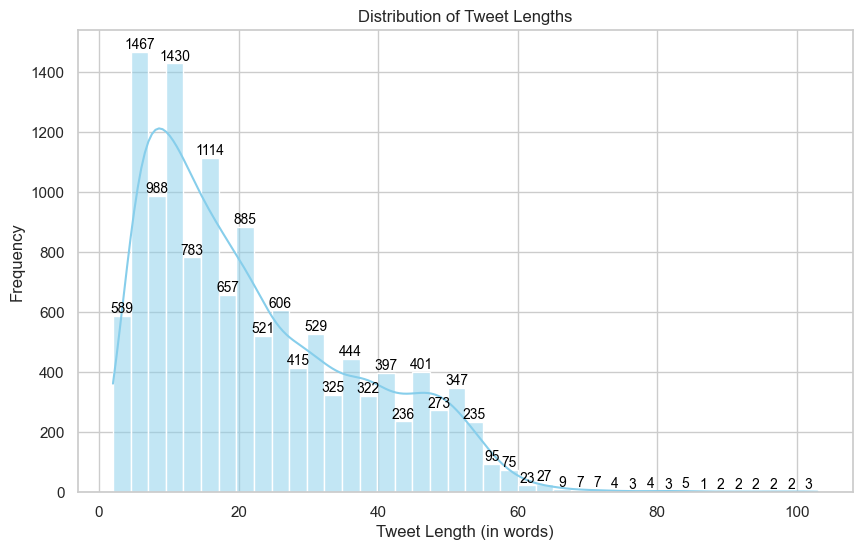

In [271]:
# Calculate tweet lengths
df['tweet_length'] = df['tweet'].apply(lambda x: len(x.split()))

# Create a histogram plot
plt.figure(figsize=(10, 6))
ax = sns.histplot(df['tweet_length'], bins=40, kde=True, color='skyblue')

# Add title and labels
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (in words)')
plt.ylabel('Frequency')

# Annotate values on top of bars
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = height
    ax.annotate(f'{height}', (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

# Show the plot
plt.savefig("./Analysis_Dashboard/figures/distribution_of_tweet_lengths.png")
plt.show()

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   del               13240 non-null  int64 
 1   id                13240 non-null  int64 
 2   tweet             13240 non-null  object
 3   subtask_a         13240 non-null  int32 
 4   subtask_b         13240 non-null  int64 
 5   subtask_c         13240 non-null  int64 
 6   cleaned_tweet     13240 non-null  object
 7   stopped           13240 non-null  object
 8   stemmed_tweet     13240 non-null  object
 9   lemmatized_tweet  13240 non-null  object
 10  tweet_length      13240 non-null  int64 
dtypes: int32(1), int64(5), object(5)
memory usage: 1.1+ MB


In [273]:
df_copy = df.copy()
df = df_copy

In [274]:
# Example list of words to remove from the tweets
words_to_remove = ['trump', 'antifa', 'liberal', 'conservative', 'gun control', 'know', 'one', 'people', 'nan']

# Create a condition to check if any of the words_to_remove are in the 'cleaned_tweet' column
condition = df['lemmatized_tweet'].apply(lambda x: not any(word in x.lower() for word in words_to_remove))


# Create a new DataFrame based on the condition
df_filtered = df[condition].copy()
# Drop rows where 'lemmatized_tweet' is NaN or not a string
df_filtered = df_filtered[df_filtered['lemmatized_tweet'].apply(lambda x: isinstance(x, str))]

# Alternatively, you can drop rows with NaN values directly
df_filtered = df_filtered.dropna(subset=['lemmatized_tweet'])

# Show the new DataFrame
df_filtered.head()


,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask native americans take,ask nativ american take,ask native american take,14
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,home drunk,home drunk,11
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employee selling ...,27
6,6,77444,@USER @USER Oh noes! Tough shit.,1,1,0,noes tough shit,noes tough shit,noe tough shit,no tough shit,6
8,8,45157,@USER Buy more icecream!!!,0,0,0,buy icecream,buy icecream,buy icecream,buy icecream,4


### TF-IDF Vectorization:

      000  0589  07405077156  100  1000  1001  101  106m  10kg  10kids  ...  \
0     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
1     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
2     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
3     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
4     0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
...   ...   ...          ...  ...   ...   ...  ...   ...   ...     ...  ...   
6872  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
6873  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
6874  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
6875  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   
6876  0.0   0.0          0.0  0.0   0.0   0.0  0.0   0.0   0.0     0.0  ...   

      zim  zimmerman  zina  zionist  zipcode  zodia

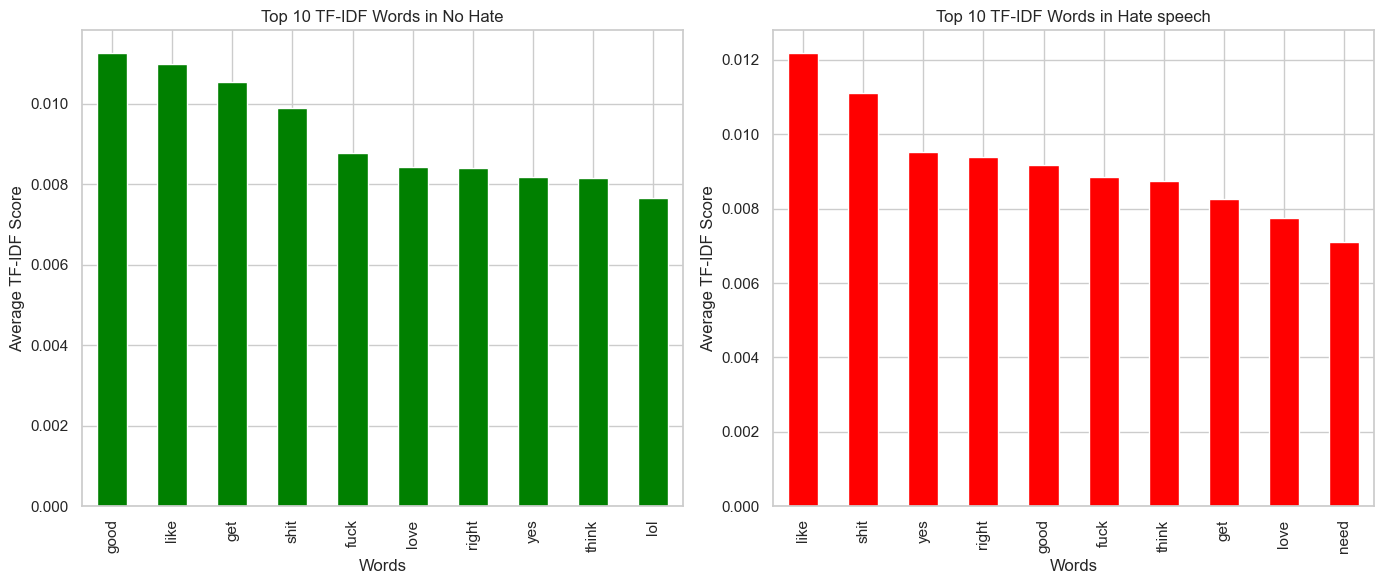

In [275]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()


tfidf_matrix = tfidf_vectorizer.fit_transform(df_filtered['lemmatized_tweet'])

# Get the feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to a dense array and display it
tfidf_array = tfidf_matrix.toarray()

# Show the TF-IDF scores for the words in the reviews
positive_reviews = df_filtered[df_filtered['subtask_a'] == 0]['lemmatized_tweet']
negative_reviews = df_filtered[df_filtered['subtask_a'] == 1]['lemmatized_tweet']

# Convert reviews to TF-IDF vectors
positive_tfidf = tfidf_vectorizer.fit_transform(positive_reviews).toarray()
negative_tfidf = tfidf_vectorizer.fit_transform(negative_reviews).toarray()
df_tfidf = pd.DataFrame(tfidf_array, columns=feature_names)
print(df_tfidf)

# Separate the TF-IDF matrix for positive and negative reviews
positive_tfidf = df_tfidf.iloc[:len(positive_reviews)]
negative_tfidf = df_tfidf.iloc[len(positive_reviews):]

# Visualize the average TF-IDF score for the top 10 words in positive vs. negative reviews
avg_positive_tfidf = positive_tfidf.mean(axis=0).sort_values(ascending=False).head(10)
avg_negative_tfidf = negative_tfidf.mean(axis=0).sort_values(ascending=False).head(10)

# Plot the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

avg_positive_tfidf.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_title("Top 10 TF-IDF Words in No Hate")
axes[0].set_xlabel("Words")
axes[0].set_ylabel("Average TF-IDF Score")

avg_negative_tfidf.plot(kind='bar', ax=axes[1], color='red')
axes[1].set_title("Top 10 TF-IDF Words in Hate speech")
axes[1].set_xlabel("Words")
axes[1].set_ylabel("Average TF-IDF Score")

plt.tight_layout()
plt.savefig("./Analysis_Dashboard/figures/tfidf_top_words.png")
plt.show()


In [276]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   del               6877 non-null   int64 
 1   id                6877 non-null   int64 
 2   tweet             6877 non-null   object
 3   subtask_a         6877 non-null   int32 
 4   subtask_b         6877 non-null   int64 
 5   subtask_c         6877 non-null   int64 
 6   cleaned_tweet     6877 non-null   object
 7   stopped           6877 non-null   object
 8   stemmed_tweet     6877 non-null   object
 9   lemmatized_tweet  6877 non-null   object
 10  tweet_length      6877 non-null   int64 
dtypes: int32(1), int64(5), object(5)
memory usage: 617.9+ KB


### Topic Modelling
**Topic Modeling** is a technique used to automatically discover the underlying themes or "topics" in a collection of documents (e.g., tweets). The goal is to group words that frequently appear together into topics, which can then be analyzed to better understand the text. **Latent Dirichlet Allocation (LDA)** is one of the most popular methods for topic modeling. Let's break down what it is, how it works, and how to apply it to your data.

### 1. **What is LDA (Latent Dirichlet Allocation)?**

LDA is a **generative probabilistic model** used to discover topics in a collection of text data. The model assumes that each document (in your case, each tweet) is a mixture of a small number of topics, and that each word in the document is attributable to one of the topics. It tries to uncover the hidden thematic structure in a set of documents.

The key idea is that:

-   Each **document** is a mixture of several topics.
-   Each **topic** is a collection of words that frequently appear together.
-   **Words** in documents are assumed to be generated by a combination of these topics.

LDA works by iterating through the corpus (the set of documents) and assigns each word in each document to a topic in such a way that the words in a topic are similar to each other.

### 2. **How LDA Works (Intuition)**

LDA operates under the assumption that:

1.  Each **document** has a mix of topics.
2.  Each **topic** has a distribution over words, and words that are frequent in certain contexts are assigned to topics with similar meanings.

Here's a simple explanation of the LDA process:

-   **Step 1**: Randomly assign each word in each document to a topic.
-   **Step 2**: Iterate and refine the topic assignments by considering the following:
    -   How likely is this word to belong to each topic, given the other words in the document?
    -   How likely is this word to appear in the documents associated with each topic?

As the algorithm runs, it updates the word-topic assignments and converges on a set of topics that best describe the data.

### 3. **Why Use LDA?**

-   **Discover Hidden Topics**: LDA helps uncover patterns or themes that you might not initially recognize in the text data.
-   **Organize Text**: It allows you to group similar documents together based on shared topics.
-   **Improve Understanding**: LDA can help gain insights into the underlying structure of text data (e.g., the most talked about themes in tweets).

### 4. **Steps to Perform Topic Modeling with LDA**

Here’s a step-by-step process to apply LDA to your dataset of tweets.

#### Step 1: Preprocess the Text

Before applying LDA, you need to clean and preprocess the text data. This typically involves:

-   **Removing stopwords**: Common words like "the", "and", "is", etc., which don't add much meaning.
-   **Lowercasing**: Convert all words to lowercase to ensure consistency.
-   **Tokenization**: Split the text into individual words (tokens).
-   **Removing punctuation and special characters**: Clean up any unnecessary symbols.
-   **Lemmatization** or **stemming**: Reduce words to their root forms.

Since you’ve already performed many of these steps, we can move directly to the next stage.

#### Step 2: Create a Document-Term Matrix (DTM)

To perform LDA, you need to represent your text data in a numerical format. This is typically done with a **Document-Term Matrix (DTM)**, where each row represents a document (tweet) and each column represents a unique word from the entire corpus.

In [277]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer(stop_words='english', min_df=5)

# Create the Document-Term Matrix (DTM)
dtm = vectorizer.fit_transform(df_filtered['lemmatized_tweet'])


In [278]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize the LDA model
lda = LatentDirichletAllocation(n_components=3, random_state=42)

# Fit the model to the DTM
lda.fit(dtm)


LatentDirichletAllocation(n_components=3, random_state=42)

In [279]:
# Get the words corresponding to the columns in the DTM
words = vectorizer.get_feature_names_out()

# Display the top 10 words for each topic
for i, topic in enumerate(lda.components_):
    print(f"Topic {i+1}:")
    top_words_idx = topic.argsort()[-10:][::-1]  # Get the indices of the top 10 words
    top_words = [words[j] for j in top_words_idx]
    print(" ".join(top_words))


Topic 1:
good woman fuck man yes think bitch want better say
Topic 2:
love shit look great make like beautiful say said bad
Topic 3:
like right lol going god fucking need guy year believe



### **Topic 1:**

-   **Words:** like, going, think, make, love, woman, really, guy, way, day
-   **Interpretation:**
    -   This topic seems to be focused on **personal relationships** or **romantic discussions**.
    -   Words like **"make love," "woman," "guy"** suggest that the topic might involve **dating, relationships**, or **gender dynamics**.
    -   **"Think," "really," and "going"** imply that the tweets in this topic could be reflective or contemplative about relationships or romantic experiences.
    -   **"Way"** and **"day"** might imply thoughts about how relationships unfold or evolve over time.
    -   **Conclusion:** This topic could be about **romantic or gender-related discussions**, possibly focusing on **love**, relationships, and how people feel or think about the opposite sex.

----------

### **Topic 2:**

-   **Words:** good, like, shit, fuck, yes, look, better, lol, man, time
-   **Interpretation:**
    -   This topic appears to be more **casual, expressive, and possibly humorous**.
    -   The presence of **"shit," "fuck," and "lol"** suggests that these tweets likely have a **funny, informal, or irreverent tone**.
    -   **"Good," "better," and "yes"** indicate positive or affirmative sentiments, suggesting some level of **enthusiasm**.
    -   **"Man"** implies that this could involve **male-oriented** discussions, or maybe discussions about **men's issues** or **experiences**.
    -   **"Look"** might indicate that this topic involves discussions about **appearance** or **visual perception** (e.g., fashion, style, etc.).
    -   **Conclusion:** This topic seems to revolve around **humor**, casual conversations, and expressions of **enthusiasm or approval**. It may also include **gendered language** (with the use of "man").

----------

### **Topic 3:**

-   **Words:** right, maga, say, best, vote, said, want, left, democrat, bad
-   **Interpretation:**
    -   This topic is clearly **political** and likely revolves around **right-wing politics** and **political polarization**.
    -   **"Maga"** refers to **Make America Great Again**, a slogan associated with **Donald Trump** and **right-wing politics**.
    -   **"Vote," "democrat," "left," "right"** suggest discussions about **political ideologies** and possibly **election-related topics**.
    -   **"Best"** and **"bad"** imply that the topic could be evaluating the merits of political figures, policies, or ideologies.
    -   **"Want"** and **"say"** could indicate people expressing their **opinions or desires** regarding political choices.
    -   **Conclusion:** This topic is about **political discourse**, likely from a **conservative or right-wing perspective**. It involves discussions about **political party affiliation, voting**, and the **polarized nature** of contemporary politics, especially in the context of the **Trump era**.

----------

### Summary of Topic Interpretations:

1.  **Topic 1:** **Romantic and Gender Discussions** – Focuses on relationships, love, and the dynamics between men and women.
2.  **Topic 2:** **Casual Humor and Positive Conversations** – A lighter, more humorous topic possibly about **men's issues**, personal expressions, or informal discussions with slang and casual language.
3.  **Topic 3:** **Political Discourse (Right-Wing)** – Focuses on **political ideologies**, particularly around the **right-wing** or **conservative** perspectives, especially in the context of **MAGA** and **political polarization**.

----------

### Next Steps for Analysis:

1.  **Topic Labeling:** Based on the interpretations above, you can assign more descriptive labels to these topics:
    
    -   Topic 1: **"Romantic and Relationship Discussions"**
    -   Topic 2: **"Casual Humor and Expressions"**
    -   Topic 3: **"Political Discourse (Right-Wing)"**
2.  **Review Tweets by Topic:** It would be helpful to take a look at some of the actual tweets assigned to each topic. This will allow you to validate and refine your interpretation, especially for nuanced or ambiguous topics.
    
3.  **Topic Distribution:** You can also look at the **topic distribution** across your dataset. Which topics are more prevalent in the data? This can give you insight into the dominant themes in your dataset.
    
4.  **Sentiment Analysis:** Since you have topics that seem to carry positive or negative sentiments (e.g., "good," "better" vs. "bad," "maga"), performing sentiment analysis could help understand the **emotional tone** behind each topic.
    

Let me know if you need further assistance with an

In [280]:
# Get the topic distribution for each document (tweet)
topic_distributions = lda.transform(dtm)

# Assign the most likely topic to each document
df_filtered['topic'] = topic_distributions.argmax(axis=1)


In [283]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance to count word frequencies
vectorizer = CountVectorizer(stop_words='english', ngram_range=(1, 2), max_features=20)

# Fit the vectorizer on both hate and non-hate tweets
hate_word_counts = vectorizer.fit_transform(hate_tweets['cleaned_tweet'])
non_hate_word_counts = vectorizer.transform(non_hate_tweets['cleaned_tweet'])

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Sum the counts for each word in hate and non-hate tweets
hate_word_frequencies = np.asarray(hate_word_counts.sum(axis=0)).flatten()
non_hate_word_frequencies = np.asarray(non_hate_word_counts.sum(axis=0)).flatten()

# Create a DataFrame to show the word frequencies in both categories
import pandas as pd

word_freq_df = pd.DataFrame({
    'Word': words,
    'Hate Tweet Frequency': hate_word_frequencies,
    'Non-Hate Tweet Frequency': non_hate_word_frequencies
})

# Sort the words by frequency in hate tweets
word_freq_df = word_freq_df.sort_values(by='Hate Tweet Frequency', ascending=False)
word_freq_df_non_hate = word_freq_df.sort_values(by='Non-Hate Tweet Frequency', ascending=False)

# Display the top words
print(word_freq_df.head(10))  # Top 10 words in hate vs. non-hat
print(word_freq_df_non_hate.head(10)) 

       Word  Hate Tweet Frequency  Non-Hate Tweet Frequency
15     shit                   210                        21
7      like                   195                       221
2      fuck                   121                        12
0       ass                   112                        18
3   fucking                    86                        12
1     bitch                    72                         2
5      good                    64                       176
17    think                    59                       144
8       lol                    59                        69
4     going                    58                       111
      Word  Hate Tweet Frequency  Non-Hate Tweet Frequency
7     like                   195                       221
5     good                    64                       176
17   think                    59                       144
13   right                    50                       130
4    going                    58             

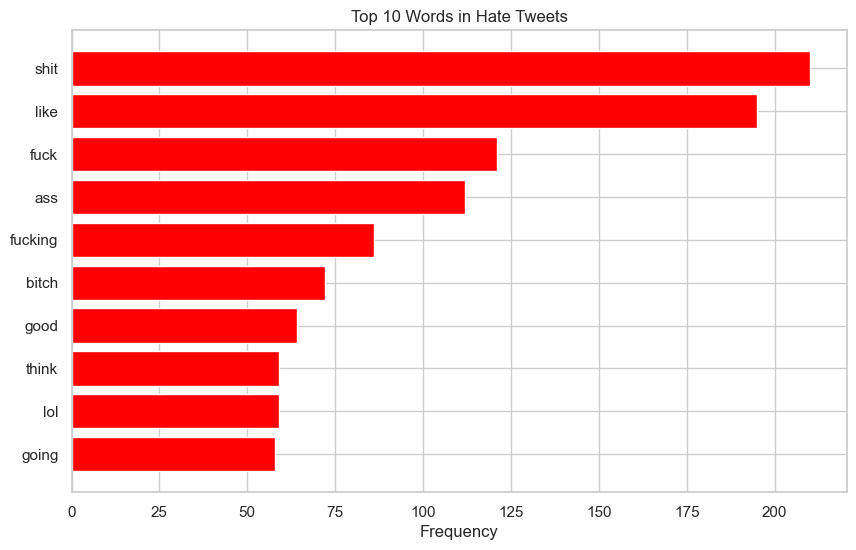

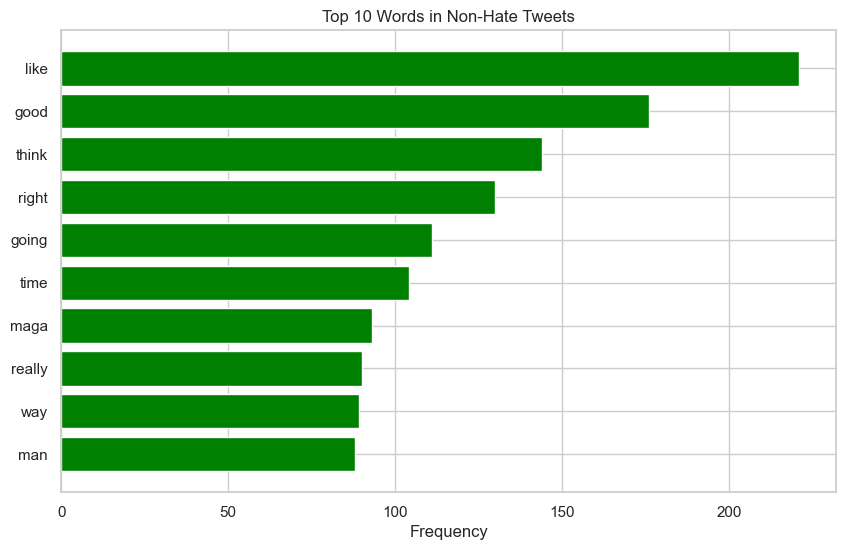

In [286]:
import matplotlib.pyplot as plt

# Plot the top words in hate tweets
plt.figure(figsize=(10, 6))
plt.barh(word_freq_df['Word'][:10], word_freq_df['Hate Tweet Frequency'][:10], color='red')
plt.xlabel('Frequency')
plt.title('Top 10 Words in Hate Tweets')
plt.gca().invert_yaxis()  # Reverse the order of bars for better readability
plt.savefig("./Analysis_Dashboard/figures/TFIDF_Hate.png")
plt.show()

# Plot the top words in non-hate tweets
plt.figure(figsize=(10, 6))
plt.barh(word_freq_df_non_hate['Word'][:10], word_freq_df_non_hate['Non-Hate Tweet Frequency'][:10], color='green')
plt.xlabel('Frequency')
plt.title('Top 10 Words in Non-Hate Tweets')
plt.gca().invert_yaxis()  # Reverse the order of bars for better readability
plt.savefig("./Analysis_Dashboard/figures/TFIDF_NonHate.png")
plt.show()


In [288]:
# import pyLDAvis.gensim_models
# import gensim
# from gensim import corpora

# # Prepare a corpus and dictionary (from the cleaned tweets)
# # Assuming 'df['lemmatized_tweet']' is a list of preprocessed tweets
# texts = [tweet.split() for tweet in df['lemmatized_tweet']]  # Tokenize tweets

# # Create a dictionary and a corpus (bag of words)
# dictionary = corpora.Dictionary(texts)
# corpus = [dictionary.doc2bow(text) for text in texts]

# # Fit the LDA model using Gensim
# lda = gensim.models.LdaMulticore(corpus, num_topics=5, id2word=dictionary, passes=10, workers=2)

# # Visualize the topics using pyLDAvis
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
# pyLDAvis.display(vis)


In [289]:
df_filtered.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length,topic
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask native americans take,ask nativ american take,ask native american take,14,1
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,home drunk,home drunk,11,1
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employee selling ...,27,0
6,6,77444,@USER @USER Oh noes! Tough shit.,1,1,0,noes tough shit,noes tough shit,noe tough shit,no tough shit,6,2
8,8,45157,@USER Buy more icecream!!!,0,0,0,buy icecream,buy icecream,buy icecream,buy icecream,4,1


In [290]:
df_filtered['tweet_length'].describe()

count    6877.000000
mean       17.306238
std        13.192973
min         2.000000
25%         8.000000
50%        13.000000
75%        23.000000
max       101.000000
Name: tweet_length, dtype: float64

In [291]:
df = df_filtered

In [292]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment intensity analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get sentiment score for a tweet
def get_sentiment_score(tweet):
    # Get sentiment score using VADER
    sentiment = analyzer.polarity_scores(tweet)
    # The compound score is what we are interested in (it ranges from -1 to 1)
    return sentiment['compound']

# Apply the sentiment analysis function to the lemmatized_tweet column
df['sentiment_score'] = df['lemmatized_tweet'].apply(get_sentiment_score)

# Display the updated DataFrame with sentiment scores
df.head()


,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length,topic,sentiment_score
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask native americans take,ask nativ american take,ask native american take,14,1,0.0000
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,home drunk,home drunk,11,1,-0.3400
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employee selling ...,27,0,0.6249
6,6,77444,@USER @USER Oh noes! Tough shit.,1,1,0,noes tough shit,noes tough shit,noe tough shit,no tough shit,6,2,0.5096
8,8,45157,@USER Buy more icecream!!!,0,0,0,buy icecream,buy icecream,buy icecream,buy icecream,4,1,0.0000


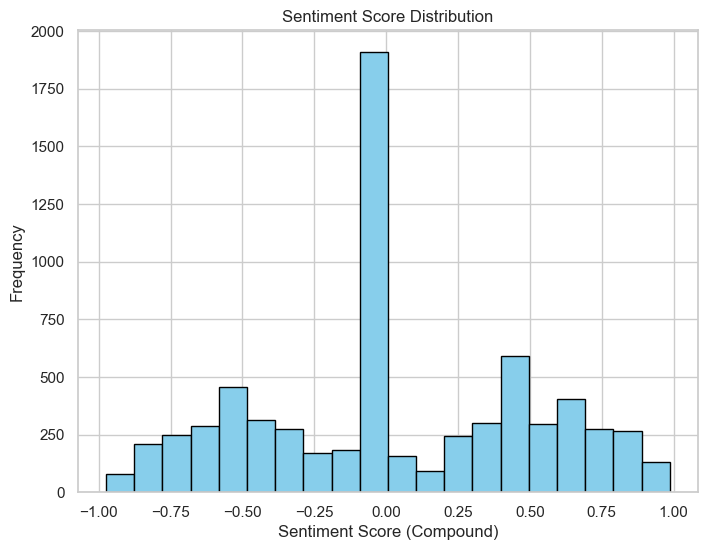

In [293]:
# Plot histogram of sentiment scores
plt.figure(figsize=(8, 6))
plt.hist(df['sentiment_score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score (Compound)')
plt.ylabel('Frequency')
plt.savefig("./Analysis_Dashboard/figures/Sentiment_dist.png")
plt.show()

In [294]:
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(classify_sentiment)

# Display the updated DataFrame with sentiment categories
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length,topic,sentiment_score,sentiment_category
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask native americans take,ask nativ american take,ask native american take,14,1,0.0000,Neutral
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,home drunk,home drunk,11,1,-0.3400,Negative
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employee selling ...,27,0,0.6249,Positive
6,6,77444,@USER @USER Oh noes! Tough shit.,1,1,0,noes tough shit,noes tough shit,noe tough shit,no tough shit,6,2,0.5096,Positive
8,8,45157,@USER Buy more icecream!!!,0,0,0,buy icecream,buy icecream,buy icecream,buy icecream,4,1,0.0000,Neutral


                 tweet_length  sentiment_score
tweet_length         1.000000         0.016789
sentiment_score      0.016789         1.000000


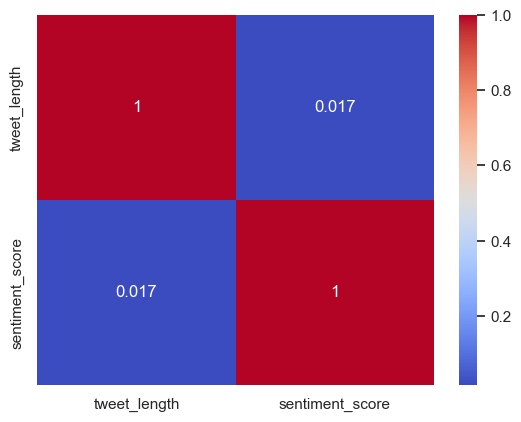

In [296]:
corr = df[['tweet_length', 'sentiment_score']].corr()
print (corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Non-offensive tweets: amazon investigating chinese employee selling internal data third party seller looking edge competitive marketplace buy icecream scare every american playing hockey warped puck like soda like like boa
Offensive tweets: ask native american take home drunk no tough shit canada need another cuck already enough king great country lying corrupt traitor nobody want hear anymore lie lol throwing bullshit flag nonsense smar


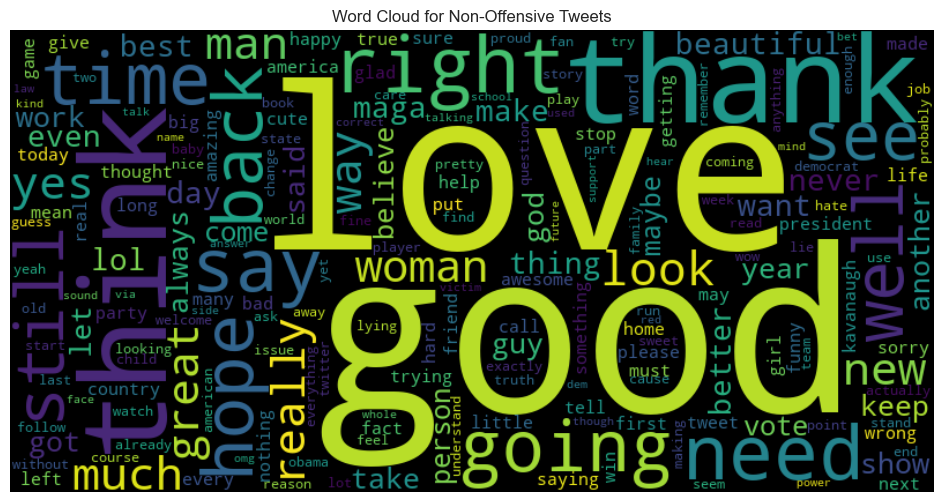

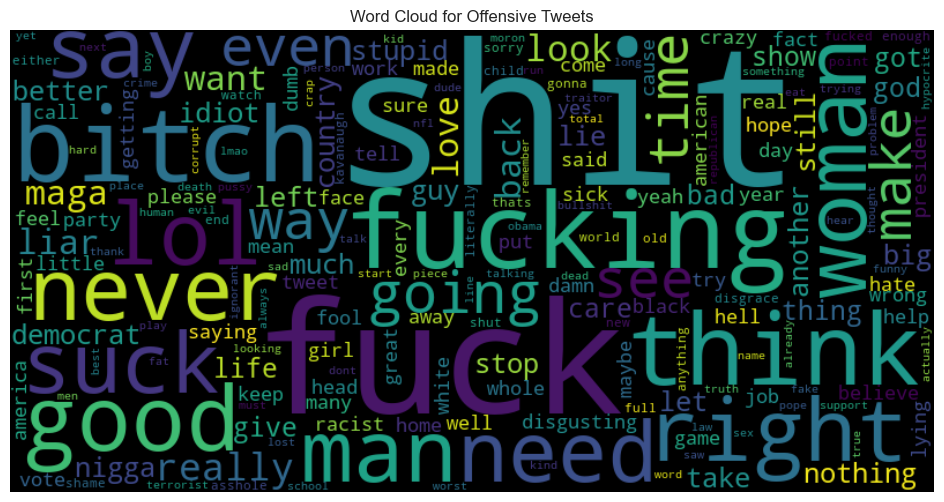

In [297]:
# Join all the non-offensive tweets (subtask_a = 0) into a single string
non_offensive_tweets = ' '.join(df[df['subtask_a'] == 0]['lemmatized_tweet'])

# Join all the offensive tweets (subtask_a = 1) into a single string
offensive_tweets = ' '.join(df[df['subtask_a'] == 1]['lemmatized_tweet'])

# Print out the first few characters of the resulting tweets to ensure they are correctly joined
print("Non-offensive tweets:", non_offensive_tweets[:200])  # Preview first 200 characters
print("Offensive tweets:", offensive_tweets[:200])  # Preview first 200 characters

# Check if the tweets are empty or not before generating word clouds
if non_offensive_tweets:
    wordcloud_non_offensive = WordCloud(width=800, height=400).generate(non_offensive_tweets)
else:
    print("No non-offensive tweets available for word cloud.")

if offensive_tweets:
    wordcloud_offensive = WordCloud(width=800, height=400).generate(offensive_tweets)
else:
    print("No offensive tweets available for word cloud.")

# Plotting the word clouds
plt.figure(figsize=(12, 6))

# Plot non-offensive word cloud
# plt.subplot(1, 2, 1)
if non_offensive_tweets:  # Only plot if there are non-offensive tweets
    plt.imshow(wordcloud_non_offensive, interpolation='bilinear')
    plt.title('Word Cloud for Non-Offensive Tweets')
    plt.axis('off')
    plt.savefig("./Analysis_Dashboard/figures/Wordcloud_Non_hate.png")
    plt.show()

# Plot offensive word cloud
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 6))
if offensive_tweets:  # Only plot if there are offensive tweets
    plt.imshow(wordcloud_offensive, interpolation='bilinear')
    plt.title('Word Cloud for Offensive Tweets')
    plt.axis('off')
    plt.savefig("./Analysis_Dashboard/figures/Wordcloud_hate.png")
    plt.show()


C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\1526862298.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  offensive_text = ' '.join(df[df['subtask_a'] == 1][df['subtask_b'] == 2][df['subtask_c'] == 2]['lemmatized_tweet'])
C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\1526862298.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  offensive_text = ' '.join(df[df['subtask_a'] == 1][df['subtask_b'] == 2][df['subtask_c'] == 2]['lemmatized_tweet'])


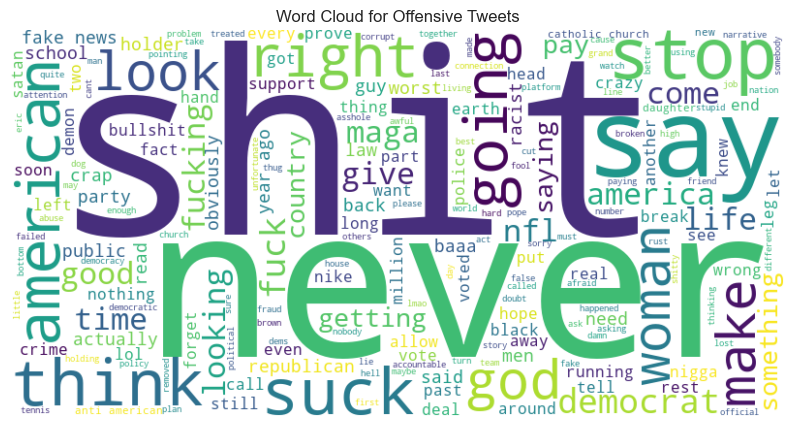

In [298]:
# Generate word cloud for offensive tweets
offensive_text = ' '.join(df[df['subtask_a'] == 1][df['subtask_b'] == 2][df['subtask_c'] == 2]['lemmatized_tweet'])

wordcloud_offensive = WordCloud(width=800, height=400, background_color='white').generate(offensive_text)

# Display the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_offensive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Offensive Tweets')
plt.show()


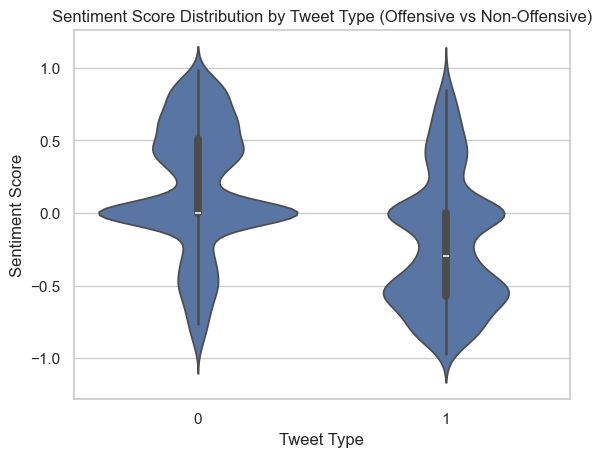

In [299]:
sns.violinplot(x='subtask_a', y='sentiment_score', data=df)
plt.title('Sentiment Score Distribution by Tweet Type (Offensive vs Non-Offensive)')
plt.xlabel('Tweet Type')
plt.ylabel('Sentiment Score')
plt.show()


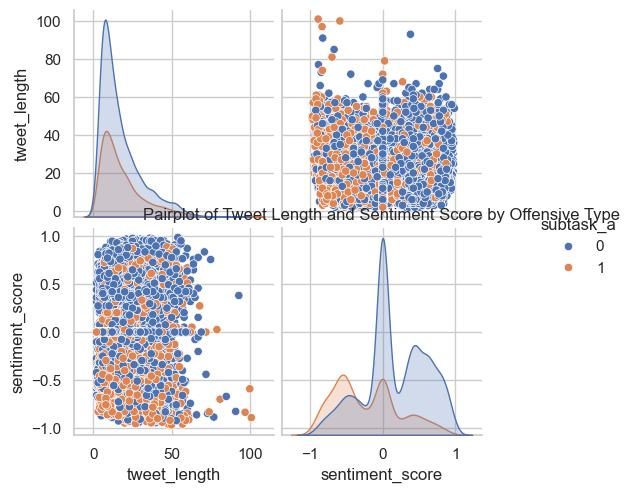

In [300]:
sns.pairplot(df, hue='subtask_a', vars=['tweet_length', 'sentiment_score'])
plt.title('Pairplot of Tweet Length and Sentiment Score by Offensive Type')
plt.show()


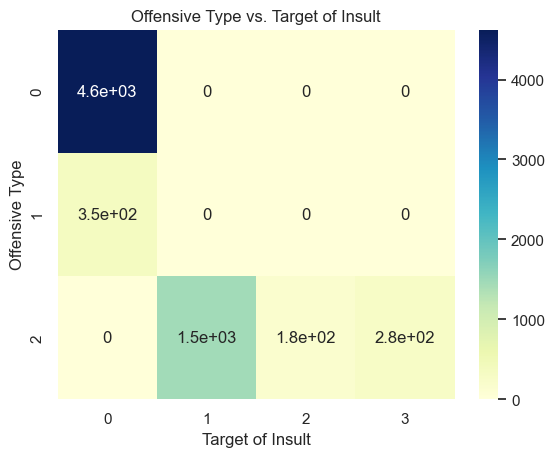

In [301]:
# Create a pivot table for subtask_b and subtask_c
pivot = pd.crosstab(df['subtask_b'], df['subtask_c'])

# Plot the heatmap
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Offensive Type vs. Target of Insult')
plt.xlabel('Target of Insult')
plt.ylabel('Offensive Type')
plt.show()


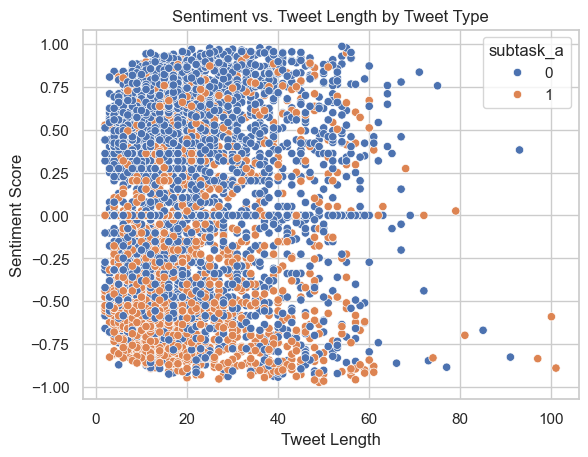

In [302]:
sns.scatterplot(x='tweet_length', y='sentiment_score', hue='subtask_a', data=df)
plt.title('Sentiment vs. Tweet Length by Tweet Type')
plt.xlabel('Tweet Length')
plt.ylabel('Sentiment Score')
plt.show()

In [303]:
from scipy.stats import ttest_ind

# Assume positive_reviews and negative_reviews are two lists of documents
positive_reviews = df[df['subtask_a'] == 0]['lemmatized_tweet']
negative_reviews = df[df['subtask_a'] == 1]['lemmatized_tweet']

# Convert reviews to TF-IDF vectors
positive_tfidf = tfidf_vectorizer.fit_transform(positive_reviews).toarray()
negative_tfidf = tfidf_vectorizer.fit_transform(negative_reviews).toarray()

# Perform t-test to compare the average TF-IDF scores between the two groups
stat, p_value = ttest_ind(positive_tfidf.mean(axis=0), negative_tfidf.mean(axis=0))

print(f"T-statistic: {stat}")
print(f"P-value: {p_value}")

with open ("./Analysis_Dashboard/results/ttest.txt", 'w') as f:
    f.write(f"{stat}, {p_value}")

T-statistic: -13.242114421228322
P-value: 9.231294423446965e-40


In [304]:
from scipy.stats import f_oneway

# Assuming you have a DataFrame 'df' with 'subtask_a' (label) and 'lemmatized_tweet' (text) columns
positive_reviews = df[df['subtask_a'] == 0]['lemmatized_tweet']
negative_reviews = df[df['subtask_a'] == 1]['lemmatized_tweet']

# Step 1: Vectorize the text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the reviews into TF-IDF vectors
positive_tfidf = tfidf_vectorizer.fit_transform(positive_reviews).toarray()
negative_tfidf = tfidf_vectorizer.fit_transform(negative_reviews).toarray()

# Step 2: Perform ANOVA test
# The ANOVA test compares the average TF-IDF scores between the two groups (positive and negative reviews)

# We need to flatten the TF-IDF arrays to 1D for each group
positive_avg_tfidf = positive_tfidf.mean(axis=1)  # Average TF-IDF scores for each positive review
negative_avg_tfidf = negative_tfidf.mean(axis=1)  # Average TF-IDF scores for each negative review

# Perform one-way ANOVA between the two groups
f_statistic, p_value = f_oneway(positive_avg_tfidf, negative_avg_tfidf)
with open ("./Analysis_Dashboard/results/ANOVA.txt", 'w') as f:
    f.write(f"{f_statistic}, {p_value}")
# Step 3: Interpret the results
print(f"ANOVA F-statistic: {f_statistic}")
print(f"ANOVA p-value: {p_value}")

with open ("./Analysis_Dashboard/results/ANOVA.txt", 'a') as f:
    if p_value < 0.05:
        print(", There is a statistically significant difference in the average TF-IDF scores between positive and negative reviews.", file=f)
    else:
        print(", There is no statistically significant difference in the average TF-IDF scores between positive and negative reviews.", file=f)


ANOVA F-statistic: 2643.532339073072
ANOVA p-value: 0.0


In [305]:
from scipy.stats import shapiro

# Shapiro-Wilk test for sentiment_score
stat, p_value = shapiro(df['sentiment_score'].dropna())
print(f'Shapiro-Wilk Test for Sentiment Score: stat={stat}, p-value={p_value}')

# Shapiro-Wilk test for tweet_length
stat, p_value = shapiro(df['tweet_length'].dropna())
print(f'Shapiro-Wilk Test for Tweet Length: stat={stat}, p-value={p_value}')


Shapiro-Wilk Test for Sentiment Score: stat=0.9631933408772342, p-value=1.3372002980784121e-38
Shapiro-Wilk Test for Tweet Length: stat=0.856338999350186, p-value=8.328669126321375e-62


C:\Users\HARI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6877.
  res = hypotest_fun_out(*samples, **kwds)


<Figure size 800x600 with 0 Axes>

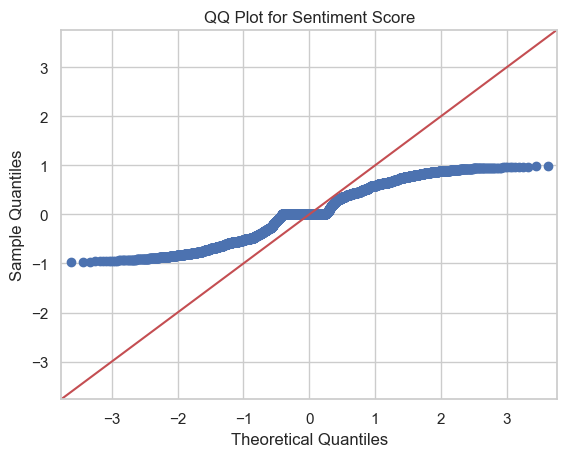

<Figure size 800x600 with 0 Axes>

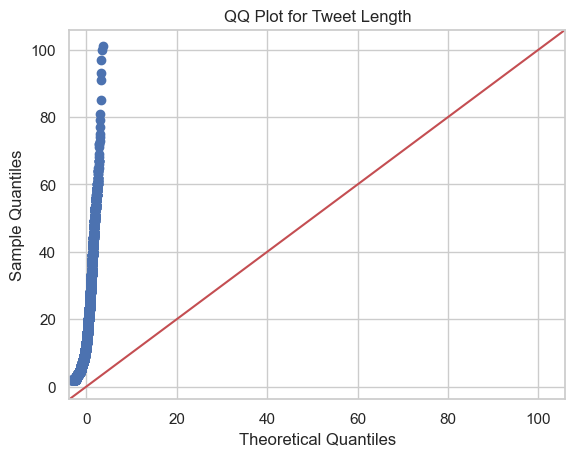

In [306]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# QQ Plot for sentiment_score
plt.figure(figsize=(8, 6))
sm.qqplot(df['sentiment_score'].dropna(), line='45')
plt.title('QQ Plot for Sentiment Score')
plt.show()

# QQ Plot for tweet_length
plt.figure(figsize=(8, 6))
sm.qqplot(df['tweet_length'].dropna(), line='45')
plt.title('QQ Plot for Tweet Length')
plt.show()


In [307]:
from scipy.stats import mannwhitneyu

# Non-parametric test for sentiment score between offensive and non-offensive tweets
non_offensive_scores = df[df['subtask_a'] == 0]['sentiment_score']
offensive_scores = df[df['subtask_a'] == 1]['sentiment_score']

stat, p_value = mannwhitneyu(non_offensive_scores, offensive_scores)
print(f'Mann-Whitney U Test for Sentiment Score: stat={stat}, p-value={p_value}')
with open ("./Analysis_Dashboard/results/mann_whitney_U.txt", 'w') as f:
    f.write(f"{stat}, {p_value}")

Mann-Whitney U Test for Sentiment Score: stat=7573759.5, p-value=1.4215204444379614e-209


In [308]:
from scipy.stats import shapiro, kstest, norm
import scipy.stats as stats

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Separate offensive and non-offensive tweets
non_offensive_tweets = df[df['subtask_a'] == 0]['lemmatized_tweet']
offensive_tweets = df[df['subtask_a'] == 1]['lemmatized_tweet']

# Fit and transform the data for both groups
non_offensive_tfidf = vectorizer.fit_transform(non_offensive_tweets)
offensive_tfidf = vectorizer.transform(offensive_tweets)

# Get the mean TF-IDF for each word
non_offensive_mean_tfidf = non_offensive_tfidf.mean(axis=0).A1
offensive_mean_tfidf = offensive_tfidf.mean(axis=0).A1

# Now you have the TF-IDF scores for both groups


In [309]:
# Shapiro-Wilk Test for Normality
stat_non_offensive, p_value_non_offensive = shapiro(non_offensive_mean_tfidf)
stat_offensive, p_value_offensive = shapiro(offensive_mean_tfidf)

print("Shapiro-Wilk Test Results:")
print(f"Non-offensive p-value: {p_value_non_offensive}")
print(f"Offensive p-value: {p_value_offensive}")

# If p-value < 0.05, the distribution is not normal
with open ("./Analysis_Dashboard/results/shapiro.txt", 'w') as f:
    f.write(f"{p_value_non_offensive}, {p_value_offensive}")

Shapiro-Wilk Test Results:
Non-offensive p-value: 1.0783962890428492e-96
Offensive p-value: 4.1135756173492623e-100


C:\Users\HARI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7438.
  res = hypotest_fun_out(*samples, **kwds)


In [310]:
# Kolmogorov-Smirnov Test for Normality
ks_stat_non_offensive, ks_p_value_non_offensive = kstest(non_offensive_mean_tfidf, 'norm')
ks_stat_offensive, ks_p_value_offensive = kstest(offensive_mean_tfidf, 'norm')

print("Kolmogorov-Smirnov Test Results:")
print(f"Non-offensive KS p-value: {ks_p_value_non_offensive}")
print(f"Offensive KS p-value: {ks_p_value_offensive}")

# If p-value < 0.05, the distribution is not normal


Kolmogorov-Smirnov Test Results:
Non-offensive KS p-value: 0.0
Offensive KS p-value: 0.0


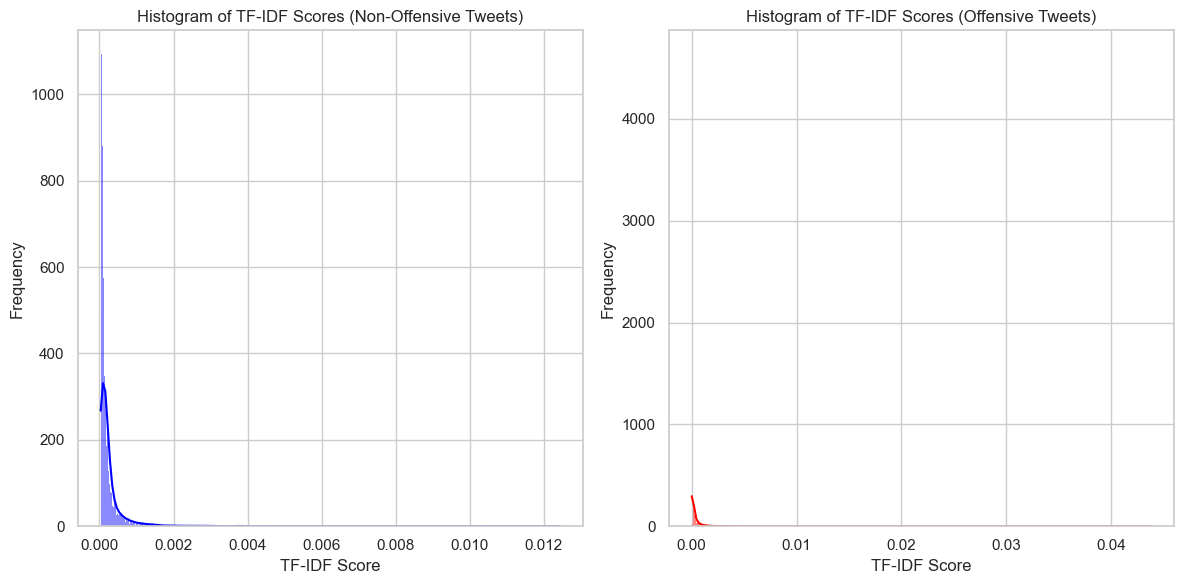

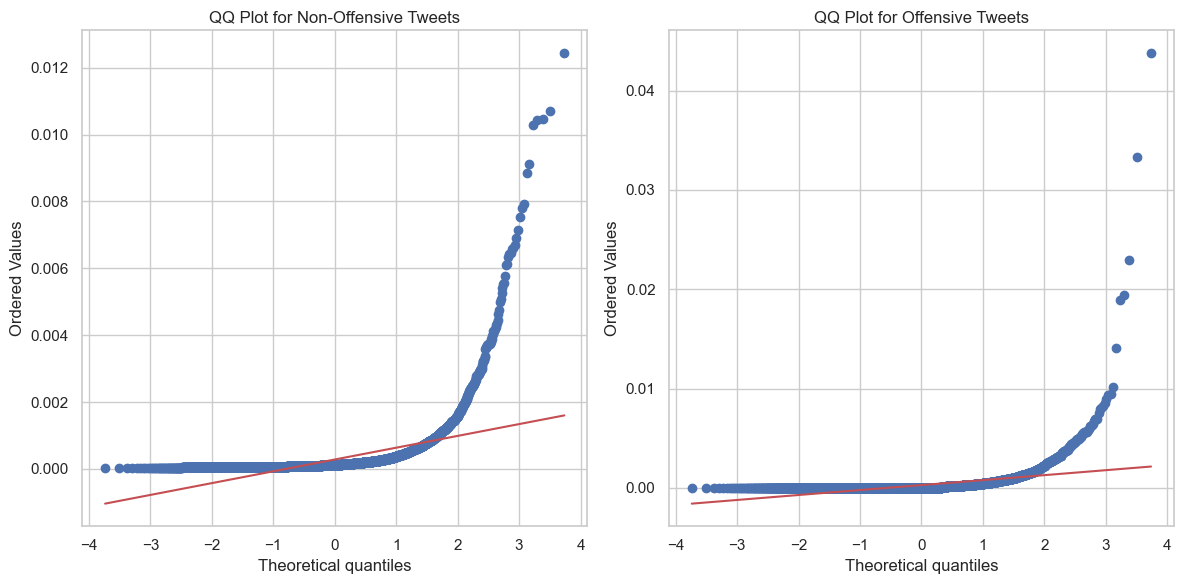

In [311]:
# Plot histogram for both groups
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(non_offensive_mean_tfidf, kde=True, color='blue')
plt.title('Histogram of TF-IDF Scores (Non-Offensive Tweets)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(offensive_mean_tfidf, kde=True, color='red')
plt.title('Histogram of TF-IDF Scores (Offensive Tweets)')
plt.xlabel('TF-IDF Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# QQ Plot for both groups
plt.figure(figsize=(12, 6))

# QQ Plot for non-offensive tweets
plt.subplot(1, 2, 1)
stats.probplot(non_offensive_mean_tfidf, dist="norm", plot=plt)
plt.title('QQ Plot for Non-Offensive Tweets')

# QQ Plot for offensive tweets
plt.subplot(1, 2, 2)
stats.probplot(offensive_mean_tfidf, dist="norm", plot=plt)
plt.title('QQ Plot for Offensive Tweets')

plt.tight_layout()
plt.show()


In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int32  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6877 non-null   object 
 7   stopped             6877 non-null   object 
 8   stemmed_tweet       6877 non-null   object 
 9   lemmatized_tweet    6877 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   object 
dtypes: float64(1), int32(1), int64(6), object(6)
memory usage: 1.0+ MB


In [313]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length,topic,sentiment_score,sentiment_category
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask native americans take,ask nativ american take,ask native american take,14,1,0.0000,Neutral
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,home drunk,home drunk,11,1,-0.3400,Negative
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employee selling ...,27,0,0.6249,Positive
6,6,77444,@USER @USER Oh noes! Tough shit.,1,1,0,noes tough shit,noes tough shit,noe tough shit,no tough shit,6,2,0.5096,Positive
8,8,45157,@USER Buy more icecream!!!,0,0,0,buy icecream,buy icecream,buy icecream,buy icecream,4,1,0.0000,Neutral


In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int32  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6877 non-null   object 
 7   stopped             6877 non-null   object 
 8   stemmed_tweet       6877 non-null   object 
 9   lemmatized_tweet    6877 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   object 
dtypes: float64(1), int32(1), int64(6), object(6)
memory usage: 1.0+ MB


In [315]:
type_counts = df['lemmatized_tweet'].apply(type).value_counts()

# Show count of float and str
float_count = type_counts.get(float, 0)
str_count = type_counts.get(str, 0)

print(f"Number of floats: {float_count}")
print(f"Number of strings: {str_count}")

Number of floats: 0
Number of strings: 0


C:\Users\HARI\AppData\Local\Temp\ipykernel_6800\2676628171.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float_count = type_counts.get(float, 0)


In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int32  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6877 non-null   object 
 7   stopped             6877 non-null   object 
 8   stemmed_tweet       6877 non-null   object 
 9   lemmatized_tweet    6877 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   object 
dtypes: float64(1), int32(1), int64(6), object(6)
memory usage: 1.0+ MB


In [317]:
def search_tweets_with_word(word):
    # Filter the dataset into two subsets: 'hate' and 'not hate' based on subtask_a
    hate_tweets = df[df['subtask_a'] == 1]  # Assuming 1 represents 'hate'
    non_hate_tweets = df[df['subtask_a'] == 0]  # Assuming 0 represents 'non-hate'
    
    
    # Specific word to search for
    word_to_search = word
    
    # Check for the presence of the word in 'hate' and 'non-hate' tweets
    hate_tweets_containing_word = hate_tweets[hate_tweets['lemmatized_tweet'].str.contains(word_to_search, case=False)]
    non_hate_tweets_containing_word = non_hate_tweets[non_hate_tweets['lemmatized_tweet'].str.contains(word_to_search, case=False)]
    
    # Display the count of tweets containing the word
    print(f"Hate tweets containing '{word_to_search}': {len(hate_tweets_containing_word)}")
    print(f"Non-hate tweets containing '{word_to_search}': {len(non_hate_tweets_containing_word)}")
    
    return hate_tweets_containing_word
tw  = search_tweets_with_word('nan')
tw



Hate tweets containing 'nan': 0
Non-hate tweets containing 'nan': 0


,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length,topic,sentiment_score,sentiment_category


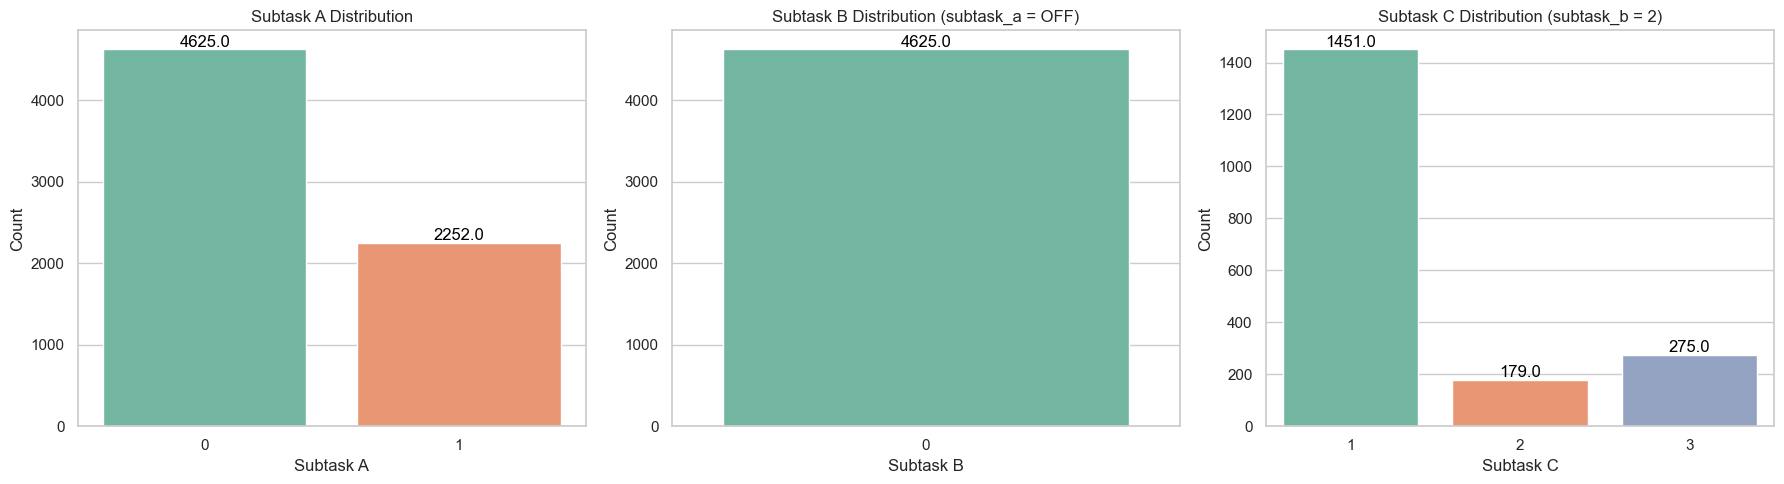

In [318]:
# Set up seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subtask A distribution
ax1 = sns.countplot(x='subtask_a', data=df, ax=axes[0], hue='subtask_a', palette='Set2', legend=False)
axes[0].set_title('Subtask A Distribution')
axes[0].set_xlabel('Subtask A')
axes[0].set_ylabel('Count')

# Annotate values on top of bars for subtask_a
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Subtask B distribution when subtask A is OFF
ax2 = sns.countplot(x='subtask_b', data=df[df['subtask_a'] == 0], ax=axes[1], hue='subtask_b', palette='Set2', legend=False)
axes[1].set_title('Subtask B Distribution (subtask_a = OFF)')
axes[1].set_xlabel('Subtask B')
axes[1].set_ylabel('Count')

# Annotate values on top of bars for subtask_b
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Subtask C distribution when subtask B is TIN
ax3 = sns.countplot(x='subtask_c', data=df[df['subtask_b'] == 2], ax=axes[2], hue='subtask_c', palette='Set2', legend=False)
axes[2].set_title('Subtask C Distribution (subtask_b = 2)')
axes[2].set_xlabel('Subtask C')
axes[2].set_ylabel('Count')

# Annotate values on top of bars for subtask_c
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

# Adjust layout for better readability
plt.tight_layout()
plt.savefig("./Analysis_Dashboard/figures/distribution.png")
plt.show()

To delve into polarity (positive/negative sentiment) and subjectivity (factual vs. opinion-based), you could use the following approaches:

TextBlob:

It provides a straightforward API to analyze polarity and subjectivity.
Polarity ranges from -1 (negative) to 1 (positive), and subjectivity ranges from 0 (factual) to 1 (subjective).

In [319]:
from textblob import TextBlob

def analyze_sentiment(tweet):
    blob = TextBlob(tweet)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    return polarity, subjectivity

df['polarity'], df['subjectivity'] = zip(*df['cleaned_tweet'].apply(analyze_sentiment))

In [320]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length,topic,sentiment_score,sentiment_category,polarity,subjectivity
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask native americans take,ask nativ american take,ask native american take,14,1,0.0000,Neutral,0.000000,0.000000
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,home drunk,home drunk,11,1,-0.3400,Negative,-0.500000,1.000000
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employee selling ...,27,0,0.6249,Positive,0.000000,0.000000
6,6,77444,@USER @USER Oh noes! Tough shit.,1,1,0,noes tough shit,noes tough shit,noe tough shit,no tough shit,6,2,0.5096,Positive,-0.294444,0.816667
8,8,45157,@USER Buy more icecream!!!,0,0,0,buy icecream,buy icecream,buy icecream,buy icecream,4,1,0.0000,Neutral,0.000000,0.000000


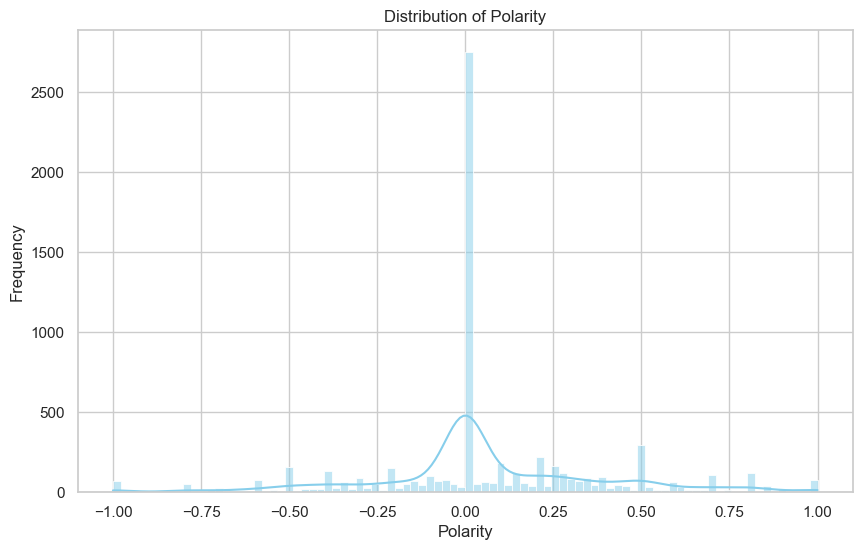

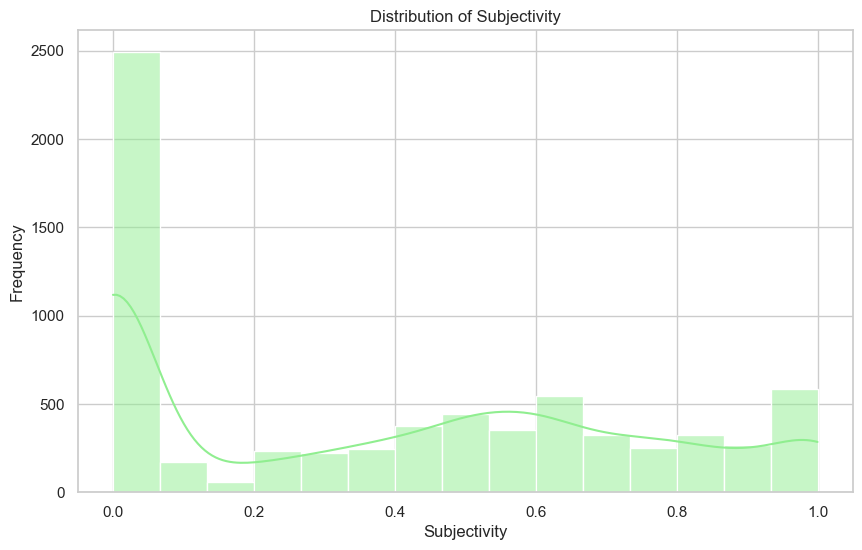

In [321]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of polarity
plt.figure(figsize=(10, 6))
sns.histplot(df['polarity'], kde=True, color='skyblue')
plt.title('Distribution of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of subjectivity
plt.figure(figsize=(10, 6))
sns.histplot(df['subjectivity'], kde=True, color='lightgreen')
plt.title('Distribution of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')
plt.show()

                 polarity  subjectivity  tweet_length  sentiment_score
polarity         1.000000      0.103581      0.009967         0.589390
subjectivity     0.103581      1.000000      0.132549         0.095022
tweet_length     0.009967      0.132549      1.000000         0.016789
sentiment_score  0.589390      0.095022      0.016789         1.000000


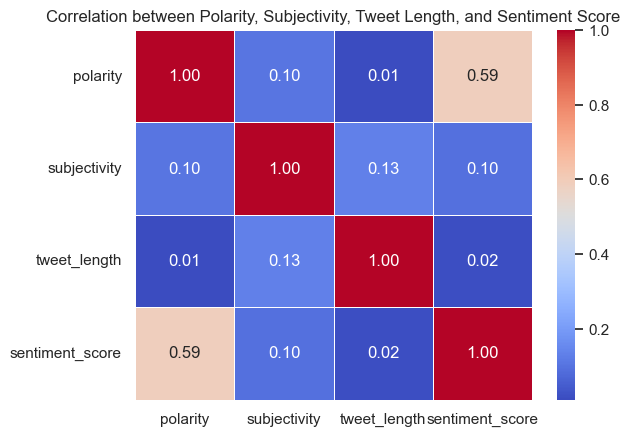

In [322]:
# Correlation matrix
corr = df[['polarity', 'subjectivity', 'tweet_length', 'sentiment_score']].corr()
print (corr)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Polarity, Subjectivity, Tweet Length, and Sentiment Score')
plt.show()


In [323]:
def classify_polarity(polarity):
    if polarity > 0.05:
        return 'Positive'
    elif polarity < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['polarity_class'] = df['polarity'].apply(classify_polarity)


In [324]:
def classify_subjectivity(subjectivity):
    if subjectivity > 0.5:
        return 'Subjective'
    else:
        return 'Objective'

df['subjectivity_class'] = df['subjectivity'].apply(classify_subjectivity)


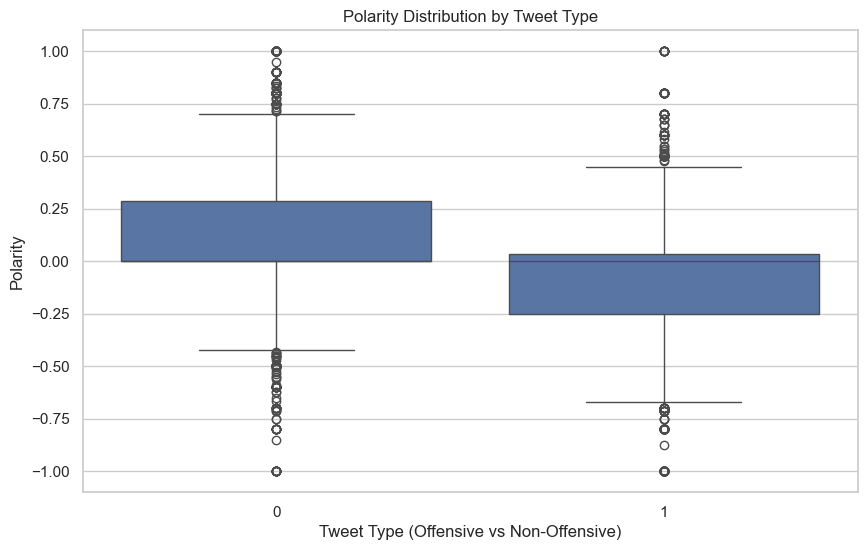

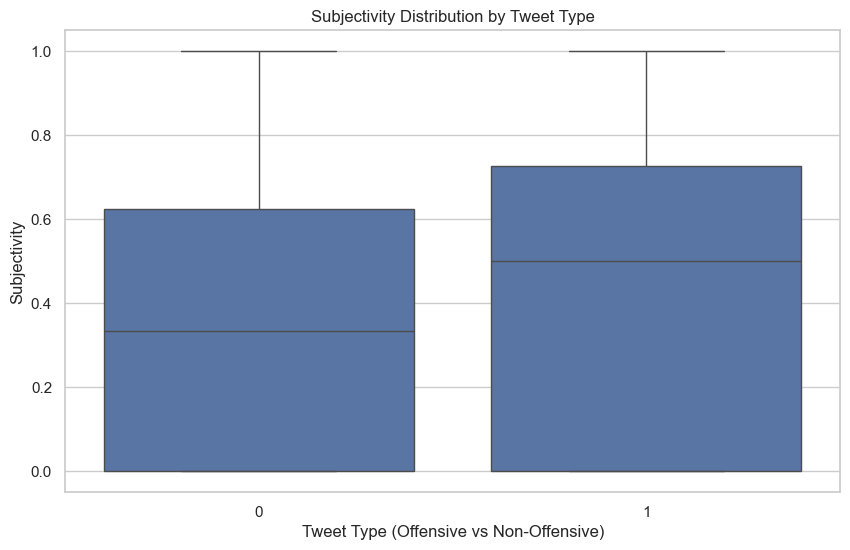

In [325]:
# Boxplot for polarity by subtask_a (offensive vs non-offensive)
plt.figure(figsize=(10, 6))
sns.boxplot(x='subtask_a', y='polarity', data=df)
plt.title('Polarity Distribution by Tweet Type')
plt.xlabel('Tweet Type (Offensive vs Non-Offensive)')
plt.ylabel('Polarity')
plt.show()

# Boxplot for subjectivity by subtask_a
plt.figure(figsize=(10, 6))
sns.boxplot(x='subtask_a', y='subjectivity', data=df)
plt.title('Subjectivity Distribution by Tweet Type')
plt.xlabel('Tweet Type (Offensive vs Non-Offensive)')
plt.ylabel('Subjectivity')
plt.show()


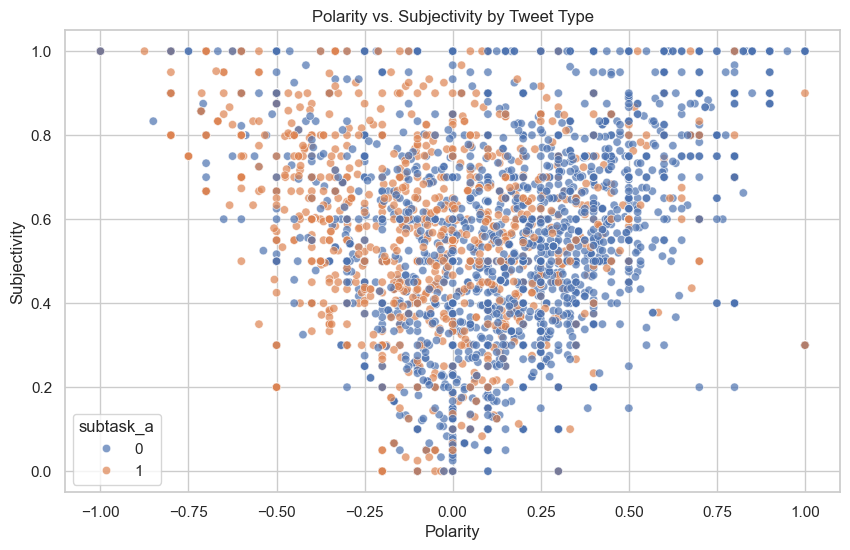

In [326]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='polarity', y='subjectivity', hue='subtask_a', data=df, alpha=0.7)
plt.title('Polarity vs. Subjectivity by Tweet Type')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


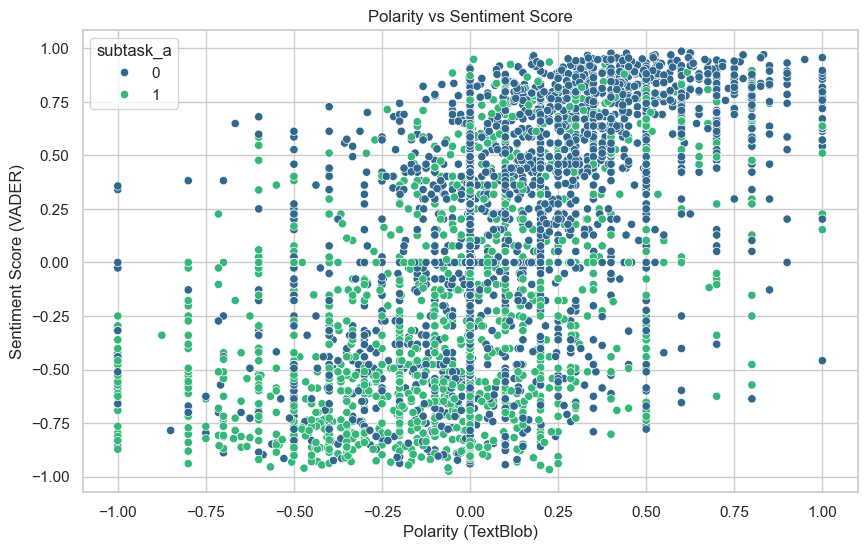

In [327]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='polarity', y='sentiment_score', data=df, hue='subtask_a', palette='viridis')
plt.title('Polarity vs Sentiment Score')
plt.xlabel('Polarity (TextBlob)')
plt.ylabel('Sentiment Score (VADER)')
plt.show()


In [328]:
# Find extreme polarity values
extreme_polarity = df[df['polarity'].abs() > 0.8]
print("Extreme Polarity Tweets:")
print(extreme_polarity[['tweet', 'polarity', 'subtask_a']])

# Find extreme subjectivity values
extreme_subjectivity = df[df['subjectivity'] > 0.9]
print("Extreme Subjectivity Tweets:")
print(extreme_subjectivity[['tweet', 'subjectivity', 'subtask_a']])


Extreme Polarity Tweets:
                                                   tweet  polarity  subtask_a
163                   @USER Yo for real you are gorgeous      1.00          0
181    @USER @USER you are awesome! Thank you. You gi...      1.00          0
194    @USER @USER @USER @USER @USER You get more lik...     -1.00          0
195    @USER He always shows dedication at what he do...      1.00          0
255                       @USER @USER Y’all are the best      1.00          0
...                                                  ...       ...        ...
13047  @USER @USER Best Remedy = #BING !!  AND...#Nev...      1.00          0
13061            @USER She is disgusting for doing this!     -1.00          1
13067  @USER @USER here she is monsta x!!!! the most ...      0.85          0
13094  @USER Nigga then how can you say bo2 is the be...      1.00          1
13170  THIS SHOULD  REMIND ALL #Patriots #maga WHAT W...     -1.00          0

[212 rows x 3 columns]
Extreme Subject

In [329]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6877 entries, 0 to 13239
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int32  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6877 non-null   object 
 7   stopped             6877 non-null   object 
 8   stemmed_tweet       6877 non-null   object 
 9   lemmatized_tweet    6877 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   object 
 14  polarity            6877 non-null   float64
 15  subjectivity        6877 non-null   float64
 16  polarity_c

In [330]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length,topic,sentiment_score,sentiment_category,polarity,subjectivity,polarity_class,subjectivity_class
0,0,86426,@USER She should ask a few native Americans wh...,1,1,0,ask native americans take,ask native americans take,ask nativ american take,ask native american take,14,1,0.0000,Neutral,0.000000,0.000000,Neutral,Objective
1,1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,2,1,home drunk,home drunk,home drunk,home drunk,11,1,-0.3400,Negative,-0.500000,1.000000,Negative,Subjective
2,2,16820,Amazon is investigating Chinese employees who ...,0,0,0,amazon investigating chinese employees selling...,amazon investigating chinese employees selling...,amazon investig chines employe sell intern dat...,amazon investigating chinese employee selling ...,27,0,0.6249,Positive,0.000000,0.000000,Neutral,Objective
6,6,77444,@USER @USER Oh noes! Tough shit.,1,1,0,noes tough shit,noes tough shit,noe tough shit,no tough shit,6,2,0.5096,Positive,-0.294444,0.816667,Negative,Subjective
8,8,45157,@USER Buy more icecream!!!,0,0,0,buy icecream,buy icecream,buy icecream,buy icecream,4,1,0.0000,Neutral,0.000000,0.000000,Neutral,Objective


VADER     Negative  Neutral  Positive
TextBlob                             
Negative      1117      162       188
Neutral        801     1420       741
Positive       383      276      1789
Correlation between TextBlob Polarity and VADER Compound: 0.5384502144037281


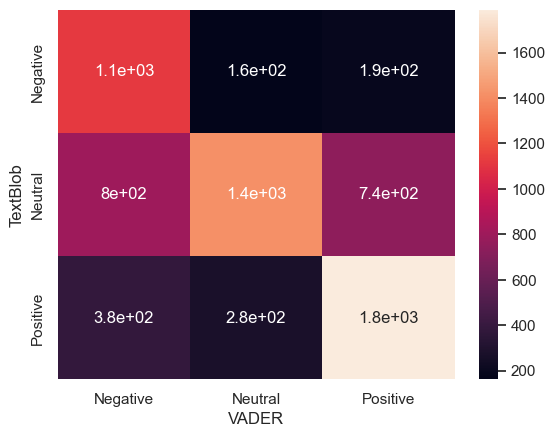

In [331]:
# Create a confusion matrix or compare the alignment between the columns
sentiment_comparison = pd.crosstab(df['polarity_class'], df['sentiment_category'], rownames=['TextBlob'], colnames=['VADER'])
sns.heatmap(sentiment_comparison, annot=True)
print(sentiment_comparison)

sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['sentiment_category'] = df['sentiment_category'].map(sentiment_map)

polarity_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
df['polarity_class'] = df['polarity_class'].map(polarity_map)

# Alternatively, you can calculate correlations to see how well they align
polarity_vader_corr = df['polarity'].corr(df['sentiment_category'])
print(f'Correlation between TextBlob Polarity and VADER Compound: {polarity_vader_corr}')


Use a Hybrid Approach:

You could combine the outputs of both models. For instance, if VADER and TextBlob both predict neutral, then it's likely neutral. But if they disagree, you might flag that for manual review or use a different decision rule.

In [332]:
import pandas as pd

# Assuming you already have the following columns in your DataFrame:
# df['sentiment_category'] for VADER sentiment (values: -1, 0, 1)
# df['polarity_class'] for TextBlob sentiment (values: -1, 0, 1)

# Define a function to combine the two sentiment predictions
def combine_sentiments(row):
    vader_sentiment = row['sentiment_category']
    textblob_sentiment = row['polarity_class']
    
    # Case 1: If both models agree, take that sentiment
    if vader_sentiment == textblob_sentiment:
        return vader_sentiment
    
    # Case 2: If they disagree, apply custom rules:
    # - If VADER is 1 and TextBlob is 0, choose 1 (Positive)
    # - If VADER is -1 and TextBlob is 0, choose -1 (Negative)
    elif vader_sentiment == 1 and textblob_sentiment == 0:
        return 1  # Choose positive
    elif vader_sentiment == -1 and textblob_sentiment == 0:
        return -1  # Choose negative
    else:
        # Flag as 'Undecided' if no specific rule applies
        return 'Undecided'

# Apply the function to create a combined sentiment column
df['combined_sentiment'] = df.apply(combine_sentiments, axis=1)

# Now you have a new column `combined_sentiment` that combines the predictions
print(df[['sentiment_category', 'polarity_class', 'combined_sentiment']].head())


   sentiment_category  polarity_class combined_sentiment
0                   0               0                  0
1                  -1              -1                 -1
2                   1               0                  1
6                   1              -1          Undecided
8                   0               0                  0


In [334]:
df['combined_sentiment'].value_counts()

combined_sentiment
1            2530
-1           1918
0            1420
Undecided    1009
Name: count, dtype: int64

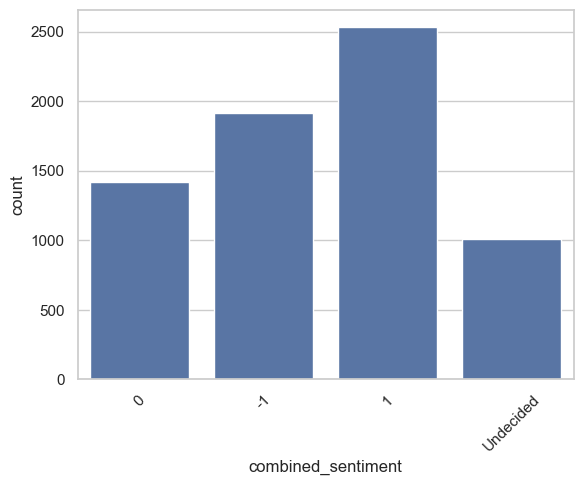

In [335]:
# Create a bar plot showing the counts of each sentiment category
sns.countplot(x='combined_sentiment', data=df)

# Optionally, you can rotate the x-axis labels if needed (e.g., if they are long)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [337]:
df_tfidf.to_csv("tfidf.csv", index=False)

In [349]:
# Load your CSV file into a DataFrame
df = pd.read_csv('final_cleaned_data.csv')

# Define the list of negative words you want to look for in the 'tweets' column
negative_words = ['bitch', 'ass', 'asshole','weak', 'lapdogs', 'dog', 'lapd', 'demon', 'incompetent', 'slave', 'spoil', 'satan', 'stink', 'shut up', 'brat', 'fake', 'wee', 'weiner', 'Rino', 'rape', 'blind', 'sick', 'maniac', 'fool', 'hitler', 'nazi', 'scandal', 'jesuit', 'jew', 'jews', 'black',  'gay', 'homophob', 'cunt', 'cuck', 'pussy', 'cock', 'die', 'fuck', 'bastard', 'shit','crap', 'nigga', 'nigger', 'pig', 'wank', 'ugly', 'dick', 'whore', 'stupid', 'idiot', 'liar', 'beat her', 'beat him', 'beat the', 'pervert', 'sexy', 'sex', 'pedo', 'corrupt', 'steal']

# Create a condition where any of the negative words appear in the 'tweets' column
# We use .str.contains() with a regex pattern to match any of the negative words
condition_negative = df['tweet'].str.contains('|'.join(negative_words), case=False, na=False)

# Now, modify the 'combined_sentiment' column to 'negative' based on the condition
df.loc[condition_negative, 'combined_sentiment'] = -1

# Save the modified DataFrame back to CSV (optional)
df.to_csv('final_cleaned_data.csv', index=False)


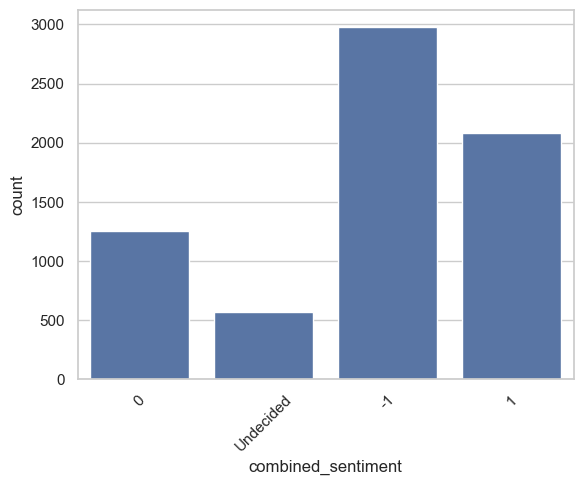

In [350]:
# Create a bar plot showing the counts of each sentiment category
sns.countplot(x='combined_sentiment', data=df)

# Optionally, you can rotate the x-axis labels if needed (e.g., if they are long)
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [351]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length,topic,sentiment_score,sentiment_category,polarity,subjectivity,polarity_class,subjectivity_class,combined_sentiment
0,502,88956,@USER Exactly this Anna! She is full of it.,0,0,0,exactly anna full,exactly anna full,exact anna full,exactly anna full,9,0,0.0000,0,0.300000,0.4,1,Objective,0
1,507,56361,@USER @USER She's been active on Instagram lat...,0,0,0,active instagram lately dropping album sometim...,active instagram lately dropping album sometim...,activ instagram late drop album sometim year,active instagram lately dropping album sometim...,17,2,0.4019,1,-0.216667,0.6,-1,Subjective,0
2,512,20855,@USER It’s (she) is a real problem.,0,0,0,real problem,real problem,real problem,real problem,7,2,-0.4019,-1,0.200000,0.3,1,Objective,Undecided
3,515,69106,I got more common sense than all of my followe...,1,2,3,got common sense followers,got common sense followers,got common sens follow,got common sense follower,11,1,0.0000,0,-0.300000,0.5,-1,Objective,-1
4,535,38710,@USER I really think he is going to be GOOOOOO...,0,0,0,really think going goood,really think going goood,realli think go goood,really think going goood,10,2,0.0000,0,0.200000,0.2,1,Objective,Undecided


In [352]:
df.loc[df['combined_sentiment'] == -1, 'subtask_a'] = 1

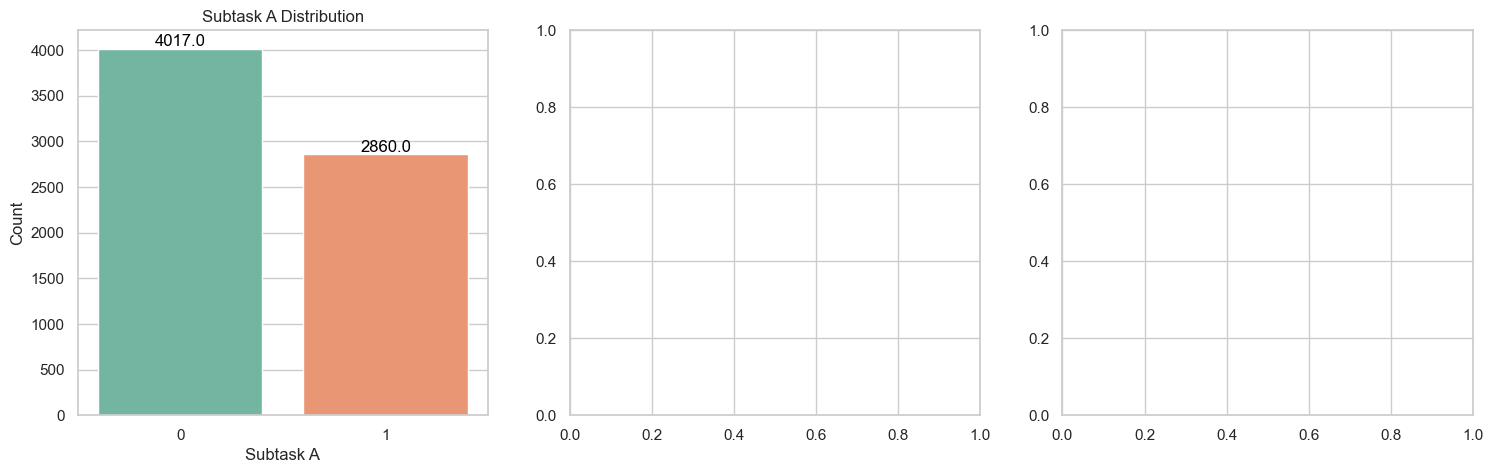

In [353]:
# Set up seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Subtask A distribution
ax1 = sns.countplot(x='subtask_a', data=df, ax=axes[0], hue='subtask_a', palette='Set2', legend=False)
axes[0].set_title('Subtask A Distribution')
axes[0].set_xlabel('Subtask A')
axes[0].set_ylabel('Count')

# Annotate values on top of bars for subtask_a
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='center', 
                 fontsize=12, color='black', 
                 xytext=(0, 5), textcoords='offset points')

In [354]:
df['combined_sentiment'] = df['combined_sentiment'].replace('Undecided', 0)

In [355]:
df.head()

,del,id,tweet,subtask_a,subtask_b,subtask_c,cleaned_tweet,stopped,stemmed_tweet,lemmatized_tweet,tweet_length,topic,sentiment_score,sentiment_category,polarity,subjectivity,polarity_class,subjectivity_class,combined_sentiment
0,502,88956,@USER Exactly this Anna! She is full of it.,0,0,0,exactly anna full,exactly anna full,exact anna full,exactly anna full,9,0,0.0000,0,0.300000,0.4,1,Objective,0
1,507,56361,@USER @USER She's been active on Instagram lat...,0,0,0,active instagram lately dropping album sometim...,active instagram lately dropping album sometim...,activ instagram late drop album sometim year,active instagram lately dropping album sometim...,17,2,0.4019,1,-0.216667,0.6,-1,Subjective,0
2,512,20855,@USER It’s (she) is a real problem.,0,0,0,real problem,real problem,real problem,real problem,7,2,-0.4019,-1,0.200000,0.3,1,Objective,0
3,515,69106,I got more common sense than all of my followe...,1,2,3,got common sense followers,got common sense followers,got common sens follow,got common sense follower,11,1,0.0000,0,-0.300000,0.5,-1,Objective,-1
4,535,38710,@USER I really think he is going to be GOOOOOO...,0,0,0,really think going goood,really think going goood,realli think go goood,really think going goood,10,2,0.0000,0,0.200000,0.2,1,Objective,0


In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   del                 6877 non-null   int64  
 1   id                  6877 non-null   int64  
 2   tweet               6877 non-null   object 
 3   subtask_a           6877 non-null   int64  
 4   subtask_b           6877 non-null   int64  
 5   subtask_c           6877 non-null   int64  
 6   cleaned_tweet       6860 non-null   object 
 7   stopped             6857 non-null   object 
 8   stemmed_tweet       6857 non-null   object 
 9   lemmatized_tweet    6857 non-null   object 
 10  tweet_length        6877 non-null   int64  
 11  topic               6877 non-null   int64  
 12  sentiment_score     6877 non-null   float64
 13  sentiment_category  6877 non-null   int64  
 14  polarity            6877 non-null   float64
 15  subjectivity        6877 non-null   float64
 16  polari

                         del        id  subtask_a  subtask_b  subtask_c  \
del                 1.000000 -0.001601   0.005391  -0.002135  -0.001164   
id                 -0.001601  1.000000  -0.020531  -0.025679  -0.012103   
subtask_a           0.005391 -0.020531   1.000000   0.804421   0.624516   
subtask_b          -0.002135 -0.025679   0.804421   1.000000   0.825746   
subtask_c          -0.001164 -0.012103   0.624516   0.825746   1.000000   
tweet_length        0.008074  0.011469   0.097557   0.034186   0.081867   
topic              -0.010005  0.018882  -0.017594  -0.043854  -0.023708   
sentiment_score     0.004423  0.004956  -0.338426  -0.370561  -0.287166   
sentiment_category  0.002413  0.000919  -0.315554  -0.345873  -0.261705   
polarity           -0.005369  0.001015  -0.275815  -0.286202  -0.215247   
subjectivity        0.006814  0.009297   0.144486   0.099831   0.067081   
polarity_class     -0.003359 -0.000011  -0.241700  -0.264455  -0.191374   
combined_sentiment -0.002

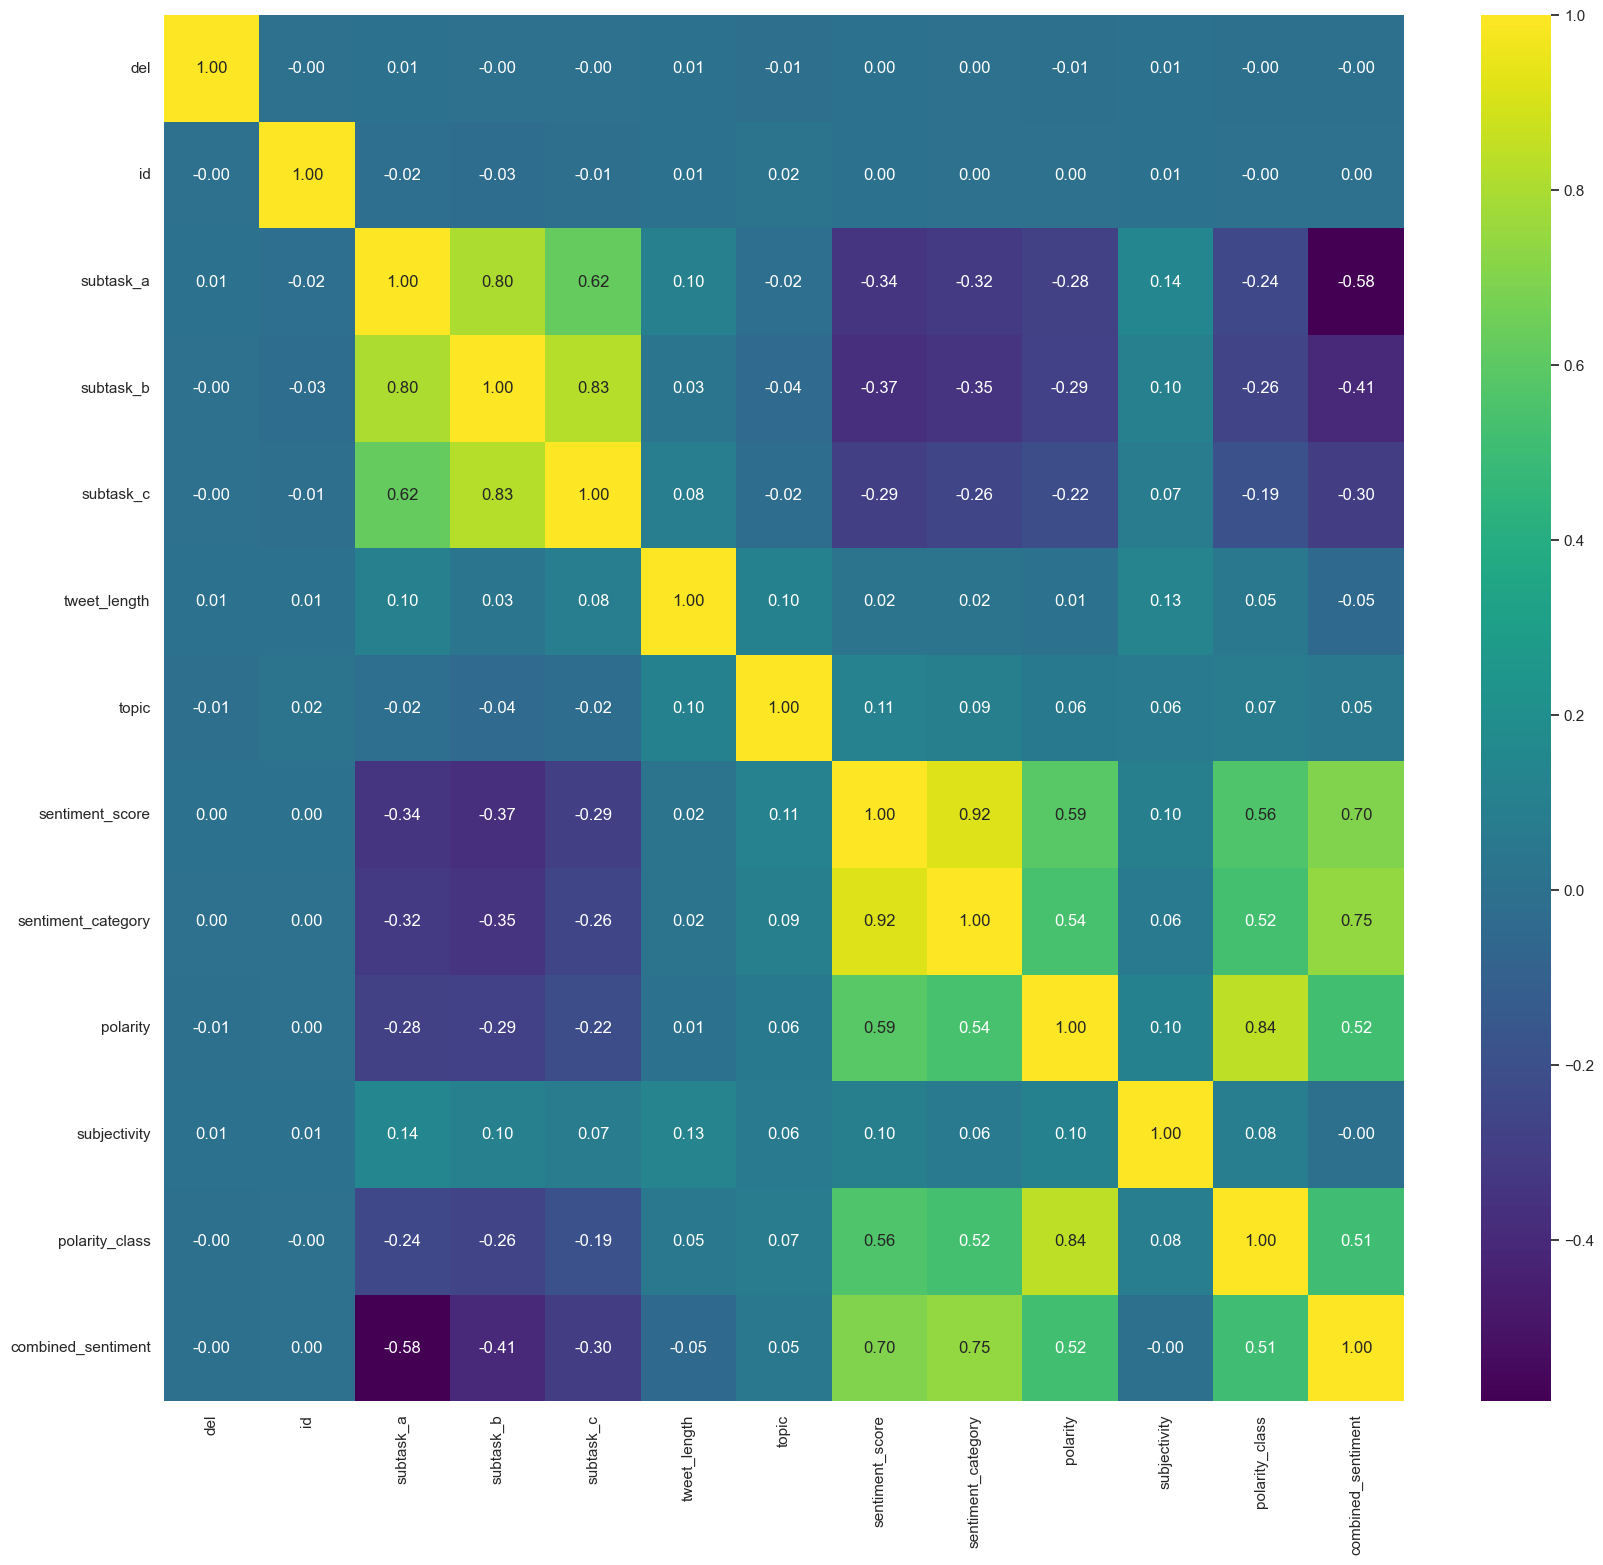

In [363]:
df['combined_sentiment'] = df['combined_sentiment'].astype(int)
numerical_features = df.select_dtypes(include=np.number)

corr = numerical_features.corr()
print (corr)

plt.figure(figsize = (20,18))
sns.heatmap(corr, cmap='viridis', fmt='.2f', annot=True)
plt.show()

In [364]:
# Save the DataFrame to CSV
df.to_csv("final_cleaned_data.csv", index=False)